#⛹️‍♂️NBA Data Analysis
Grupo:
  - Amanda Moraes (ascm)
  - Tales Alves (tta)

Dataset: https://www.kaggle.com/datasets/justinas/nba-players-data

Outras fontes de dados: https://www.basketball-reference.com/ 

##✅Passo a passo
* Coletar dados ✔
  - Extrair mais dados da web ✔
* Pré-processamento dos dados ✔
  - Definição de tipos ✔
  - Tratamento de dados ausentes ✔
  - Normalização e discretização ✔
  - Limpeza de dados/remoção de outliers ✔
* Apresentar estatísticas descritivas utilizando visualizações ✔
* Realizar testes de hipóteses para comparação dos valores de categorias e visualizar diferenças

##🗂️Dependencias

In [1]:
! pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.3 MB/s 


In [2]:
import pandas as pd
import numpy as np
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup
from unidecode import unidecode
import seaborn as sns
from sklearn.covariance import EllipticEnvelope
from sklearn import preprocessing

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##🎲Carregar dados iniciais

In [ ]:
# Path Amanda
data_path = '/content/drive/MyDrive/facul/2022.1/TAGDI/projeto1/data/all_seasons.csv'

In [ ]:
# Path Tales
data_path = '/content/drive/MyDrive/2022.1/TA GDI/projeto1/data/all_seasons.csv'

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
11695,11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21
11699,11699,Aaron Gordon,DEN,25.0,203.20,106.594120,Arizona,USA,2014,1,...,12.4,5.7,3.2,2.1,0.055,0.150,0.204,0.547,0.165,2020-21


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

##➕Acrescentar dados
- Não encontramos na base de dados do Kaggle os dados da última temporada da NBA, portanto, fomos em busca desses dados mais recentes no site [Basketball Reference](https://www.basketball-reference.com)
- Boa parte das colunas faltantes podem ser encontradas em diferentes tabelas e nas páginas individuais dos jogadores (como país de origem, faculdade etc)

###📅Per Game Table
Para obter:
- Nome, time, idade, jogos, pontos, rebotes, assistências e temporada

In [ ]:
df_new = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_per_game.html', header=0)[0]

In [ ]:
df_new.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
837,601,Thaddeus Young,PF,33,TOR,26,0,18.3,2.6,5.5,...,.481,1.5,2.9,4.4,1.7,1.2,0.4,0.8,1.7,6.3
838,602,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,.904,0.7,3.1,3.7,9.7,0.9,0.1,4.0,1.7,28.4
839,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,.623,1.5,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3
840,604,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,.776,1.9,2.8,4.6,0.8,0.3,0.2,0.7,2.1,5.2
841,605,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,...,.727,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3


In [ ]:
df_new.shape

(842, 30)

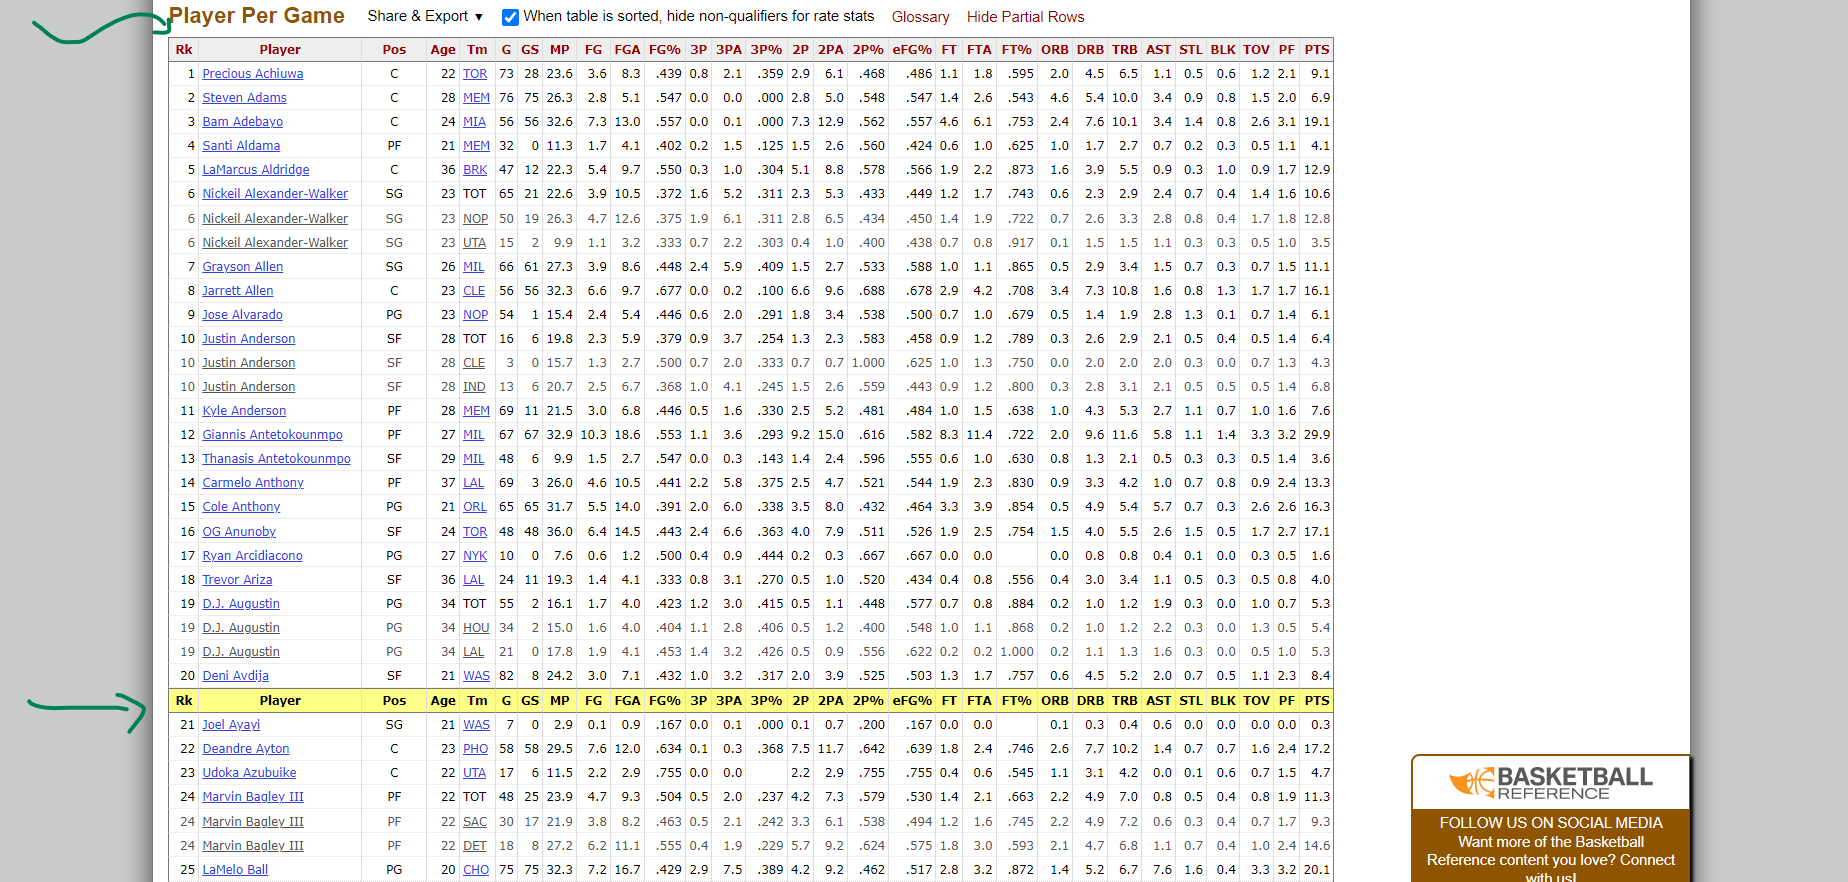

A tabela lida do endereço acima tem algumas linhas de títulos intercaladas com as linhas de dados propriamente ditos, como na imagem acima, por isso elas serão removidas:

In [ ]:
df_new = df_new[df_new.Rk != 'Rk']

In [ ]:
df_new.shape

(812, 30)

In [ ]:
df_new.reset_index(drop=True, inplace=True)

In [ ]:
df_new.drop(columns=['Rk'], inplace=True)

**Renomeando colunas** dos dados obtidos da tabela Per Game para corresponder às suas equivalentes do dataset inicial:

In [ ]:
print(df.columns, '\n\n', df_new.columns)

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object') 

 Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [ ]:
df_new.rename(columns={'Player': 'player_name', 'Age': 'age', 'Tm': 'team_abbreviation', 'G': 'gp', 'TRB': 'reb', 'AST': 'ast', 'PTS': 'pts'}, inplace=True)
df_new.head()

,player_name,Pos,age,team_abbreviation,gp,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,reb,ast,STL,BLK,TOV,PF,pts
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,.439,...,.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,.547,...,.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,.557,...,.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,.402,...,.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,.550,...,.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


**Removendo colunas** dos dados obtidos da tabela Per Game que não têm equivalentes no dataset inicial:

In [ ]:
df_new.drop(columns=['Pos', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 
                     'DRB', 'STL', 'BLK', 'TOV', 'PF'], inplace=True)
df_new.tail()

,player_name,age,team_abbreviation,gp,reb,ast,pts
807,Thaddeus Young,33,TOR,26,4.4,1.7,6.3
808,Trae Young,23,ATL,76,3.7,9.7,28.4
809,Omer Yurtseven,23,MIA,56,5.3,0.9,5.3
810,Cody Zeller,29,POR,27,4.6,0.8,5.2
811,Ivica Zubac,24,LAC,76,8.5,1.6,10.3


**Reordenando colunas**

In [ ]:
cols = df_new.columns.tolist()
cols = [cols[0], cols[2], cols[1], cols[3], cols[6], cols[4], cols[5]]
df_new = df_new[cols]
df_new.head()

,player_name,team_abbreviation,age,gp,pts,reb,ast
0,Precious Achiuwa,TOR,22,73,9.1,6.5,1.1
1,Steven Adams,MEM,28,76,6.9,10.0,3.4
2,Bam Adebayo,MIA,24,56,19.1,10.1,3.4
3,Santi Aldama,MEM,21,32,4.1,2.7,0.7
4,LaMarcus Aldridge,BRK,36,47,12.9,5.5,0.9


**Inicializando novas colunas** antes de buscar os dados para preenchê-las

In [ ]:
df_new.insert(3, 'player_height', np.nan)

In [ ]:
df_new.insert(4, 'player_weight', np.nan)

In [ ]:
df_new.insert(5, 'college', '')

In [ ]:
df_new.insert(6, 'country', '')

In [ ]:
df_new.insert(7, 'draft_year', np.nan)
df_new.insert(8, 'draft_round', np.nan)
df_new.insert(9, 'draft_number', np.nan)

In [ ]:
df_new.insert(14, 'net_rating', np.nan)
df_new.insert(15, 'oreb_pct', np.nan)
df_new.insert(16, 'dreb_pct', np.nan)
df_new.insert(17, 'usg_pct', np.nan)
df_new.insert(18, 'ts_pct', np.nan)
df_new.insert(19, 'ast_pct', np.nan)

In [ ]:
df_new['season']='2021-22'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Precious Achiuwa,TOR,22,NaN,NaN,,,NaN,NaN,NaN,...,9.1,6.5,1.1,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
1,Steven Adams,MEM,28,NaN,NaN,,,NaN,NaN,NaN,...,6.9,10.0,3.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
2,Bam Adebayo,MIA,24,NaN,NaN,,,NaN,NaN,NaN,...,19.1,10.1,3.4,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
3,Santi Aldama,MEM,21,NaN,NaN,,,NaN,NaN,NaN,...,4.1,2.7,0.7,NaN,NaN,NaN,NaN,NaN,NaN,2021-22
4,LaMarcus Aldridge,BRK,36,NaN,NaN,,,NaN,NaN,NaN,...,12.9,5.5,0.9,NaN,NaN,NaN,NaN,NaN,NaN,2021-22


###📅Advanced Table
Para obter:
  * True Shooting %, Offensive Rebound %, Defensive Rebound %, Assist %, Usage Rate (%) 

In [ ]:
df_advanced = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_advanced.html', header=0)[0]
df_advanced.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,C,22,TOR,73,1725,12.7,.503,.259,...,NaN,0.4,2.1,2.5,.070,NaN,-2.0,-0.6,-2.6,-0.2
1,2,Steven Adams,C,28,MEM,76,1999,17.6,.560,.003,...,NaN,3.8,3.0,6.8,.163,NaN,1.0,1.0,2.0,2.0
2,3,Bam Adebayo,C,24,MIA,56,1825,21.8,.608,.008,...,NaN,3.6,3.5,7.2,.188,NaN,1.7,2.1,3.8,2.7
3,4,Santi Aldama,PF,21,MEM,32,360,10.2,.452,.364,...,NaN,-0.1,0.4,0.3,.044,NaN,-4.2,-1.5,-5.7,-0.3
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,19.6,.604,.100,...,NaN,2.1,1.0,3.1,.141,NaN,1.3,-0.6,0.7,0.7


In [ ]:
df_advanced.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'Unnamed: 19', 'OWS', 'DWS', 'WS', 'WS/48', 'Unnamed: 24', 'OBPM',
       'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [ ]:
df_advanced.shape

(842, 29)

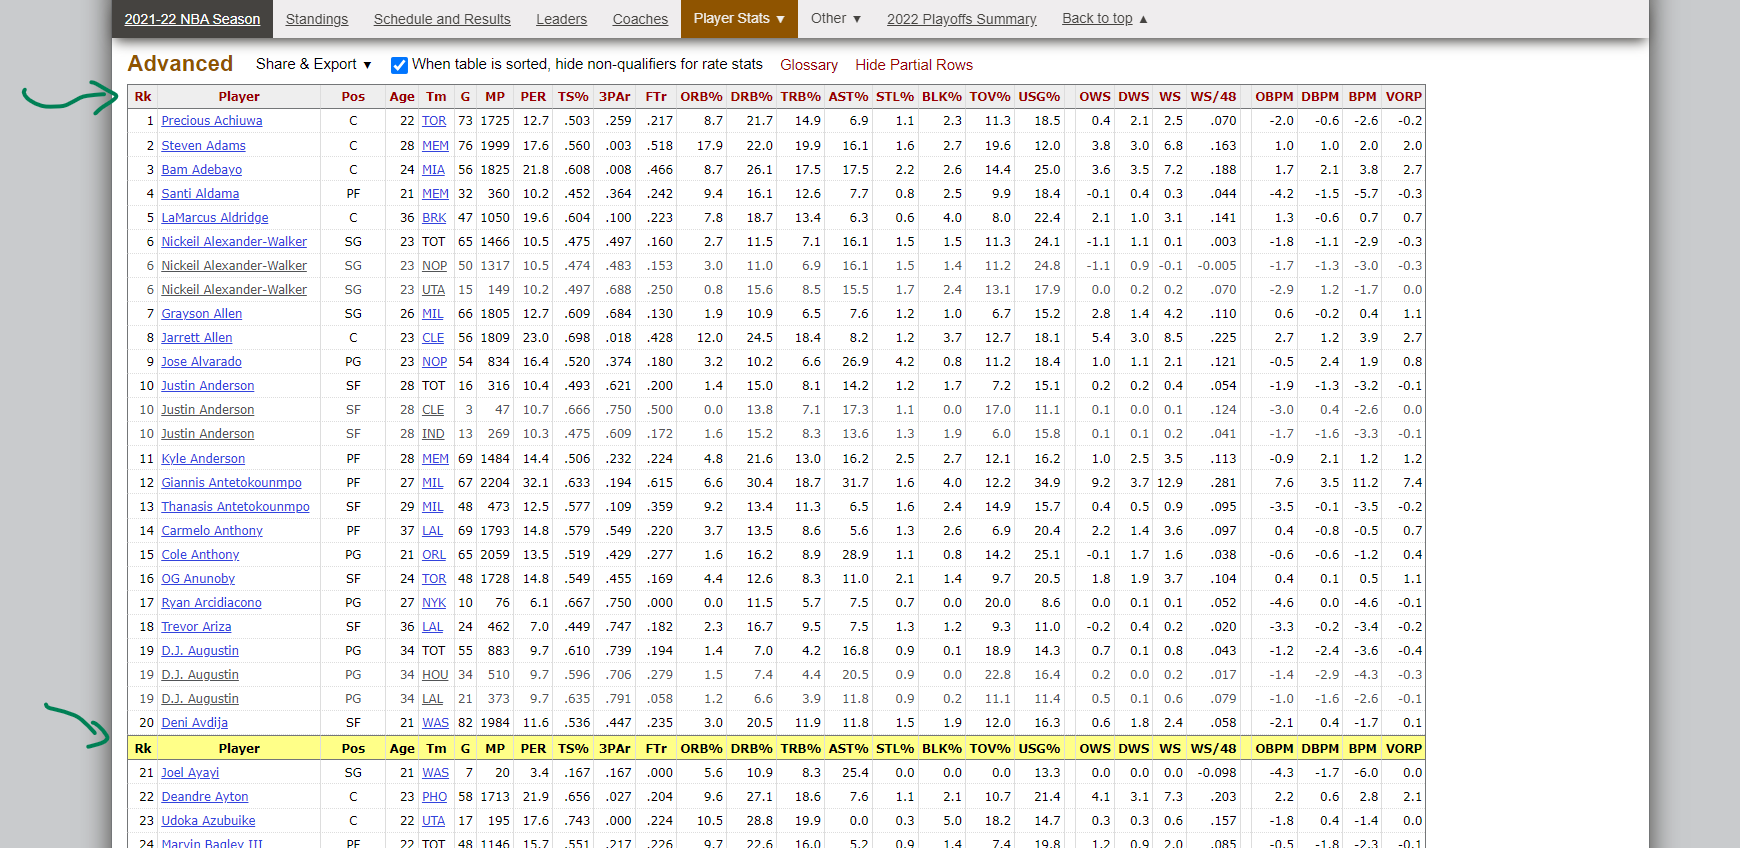

A tabela lida do endereço acima tem algumas linhas de títulos intercaladas com as linhas de dados propriamente ditos, como na imagem acima, por isso elas serão removidas:

In [ ]:
df_advanced = df_advanced[df_advanced['Rk'] != 'Rk']

In [ ]:
df_advanced.shape

(812, 29)

In [ ]:
df_advanced.reset_index(drop=True, inplace=True)

In [ ]:
df_advanced.tail()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
807,601,Thaddeus Young,PF,33,TOR,26,475,15.8,.526,.299,...,NaN,0.5,0.8,1.3,.127,NaN,-0.2,2.2,2.0,0.5
808,602,Trae Young,PG,23,ATL,76,2652,25.4,.603,.395,...,NaN,9.0,1.0,10.0,.181,NaN,7.1,-2.0,5.2,4.8
809,603,Omer Yurtseven,C,23,MIA,56,706,17.4,.546,.045,...,NaN,0.8,1.4,2.1,.145,NaN,-1.4,0.4,-1.0,0.2
810,604,Cody Zeller,C,29,POR,27,355,17.2,.627,.044,...,NaN,0.9,0.2,1.1,.143,NaN,-1.2,-1.0,-2.1,0.0
811,605,Ivica Zubac,C,24,LAC,76,1852,19.2,.660,.000,...,NaN,4.3,2.9,7.2,.187,NaN,-0.1,0.8,0.7,1.3


**Definindo os valores de colunas** inicializadas anteriormente com base nas colunas da tabela Advanced:

In [ ]:
df_new['ts_pct']=pd.to_numeric(df_advanced['TS%'])

In [ ]:
df_new['oreb_pct']=pd.to_numeric(df_advanced['ORB%'])/100
df_new['dreb_pct']=pd.to_numeric(df_advanced['DRB%'])/100
df_new['usg_pct']=pd.to_numeric(df_advanced['USG%'])/100
df_new['ast_pct']=pd.to_numeric(df_advanced['AST%'])/100

In [ ]:
df_new.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Precious Achiuwa,TOR,22,203.0,102.0,Memphis,Nigeria,2020.0,1.0,20.0,...,9.1,6.5,1.1,0.0,0.087,0.217,0.185,0.503,0.069,2021-22
1,Steven Adams,MEM,28,211.0,120.0,Pitt,New Zealand,2013.0,1.0,12.0,...,6.9,10.0,3.4,4.2,0.179,0.220,0.120,0.560,0.161,2021-22
2,Bam Adebayo,MIA,24,206.0,115.0,Kentucky,USA,2017.0,1.0,14.0,...,19.1,10.1,3.4,5.5,0.087,0.261,0.250,0.608,0.175,2021-22
3,Santi Aldama,MEM,21,211.0,101.0,Loyola (MD),Spain,2021.0,1.0,30.0,...,4.1,2.7,0.7,-3.8,0.094,0.161,0.184,0.452,0.077,2021-22
4,LaMarcus Aldridge,BRK,36,211.0,113.0,Texas,USA,2006.0,1.0,2.0,...,12.9,5.5,0.9,0.1,0.078,0.187,0.224,0.604,0.063,2021-22


In [ ]:
df_new.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
807,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,5.7,0.087,0.181,0.160,0.526,0.136,2021-22
808,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,-1.2,0.021,0.096,0.344,0.603,0.467,2021-22
809,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,NaN,0.139,0.330,0.199,0.546,0.110,2021-22
810,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,1.5,0.149,0.241,0.159,0.627,0.094,2021-22
811,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,0.5,0.128,0.237,0.168,0.660,0.098,2021-22


###📅Play-by-play Table
Para obter:
  * net rating

In [ ]:
df_pbp = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_play-by-play.html', header=1)[0]
df_pbp.head()

,Rk,Player,Pos,Age,Tm,G,MP,PG%,SG%,SF%,...,On-Off,BadPass,LostBall,Shoot,Off.,Shoot.1,Off..1,PGA,And1,Blkd
0,1,Precious Achiuwa,C,22,TOR,73,1725,NaN,NaN,NaN,...,0.0,19,26,70,24,64,10,200,15,51
1,2,Steven Adams,C,28,MEM,76,1999,NaN,NaN,NaN,...,4.2,71,15,78,19,83,13,569,23,44
2,3,Bam Adebayo,C,24,MIA,56,1825,NaN,NaN,NaN,...,5.5,59,39,72,38,173,8,480,48,40
3,4,Santi Aldama,PF,21,MEM,32,360,NaN,NaN,3%,...,-3.8,7,3,16,5,16,1,58,5,5
4,5,LaMarcus Aldridge,C,36,BRK,47,1050,NaN,NaN,NaN,...,0.1,12,11,46,12,56,0,110,22,11


In [ ]:
df_pbp.dtypes

Rk          object
Player      object
Pos         object
Age         object
Tm          object
G           object
MP          object
PG%         object
SG%         object
SF%         object
PF%         object
C%          object
OnCourt     object
On-Off      object
BadPass     object
LostBall    object
Shoot       object
Off.        object
Shoot.1     object
Off..1      object
PGA         object
And1        object
Blkd        object
dtype: object

In [ ]:
df_pbp.shape

(842, 23)

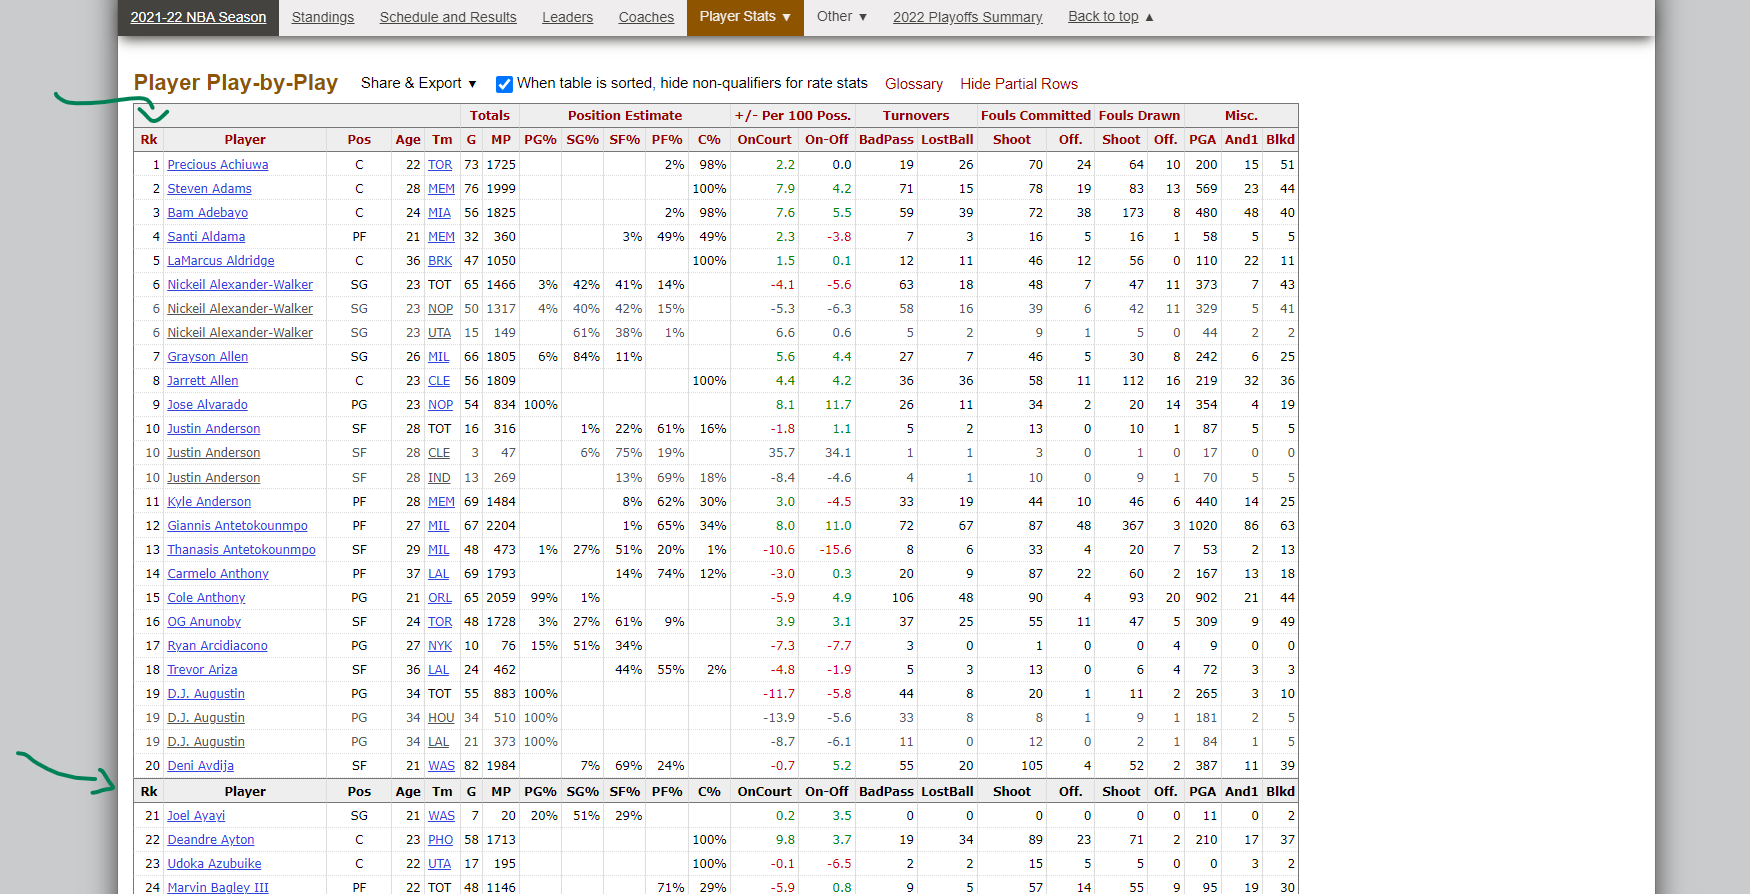

A tabela lida do endereço acima tem algumas linhas de títulos intercaladas com as linhas de dados propriamente ditos, como na imagem acima, por isso elas serão removidas:

In [ ]:
df_pbp=df_pbp[df_pbp['Rk'] != 'Rk']

In [ ]:
df_pbp.reset_index(drop=True, inplace=True)

In [ ]:
df_pbp.shape

(812, 23)

**Definindo os valores de colunas** inicializadas anteriormente com base nas colunas da tabela Play-by-play:

In [ ]:
df_new['net_rating']=pd.to_numeric(df_pbp['On-Off'])

In [ ]:
df_new.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
807,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,4.4,0.087,0.181,0.160,0.526,0.136,2021-22
808,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,3.4,0.021,0.096,0.344,0.603,0.467,2021-22
809,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,0.3,0.139,0.330,0.199,0.546,0.110,2021-22
810,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,6.8,0.149,0.241,0.159,0.627,0.094,2021-22
811,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,-6.8,0.128,0.237,0.168,0.660,0.098,2021-22


###📅Dados gerais do jogador
Para obter:
* Peso e altura
* Faculdade
* País
* Informações do draft

Pegando os links para as páginas dos jogadores
- Identificar o elemento pai da tabela que contém uma coluna de jogadores
- Para cada linha obter o path da página individual dos jogadores

In [ ]:
url = 'https://www.basketball-reference.com/leagues/NBA_2022_per_game.html'
soup = BeautifulSoup(urlopen(url), 'html.parser')
info = soup.find(id="per_game_stats")
body = info.tbody
player_links = []
for row in body.find_all('tr'):
    if row.td:
      player_links.append(row.td.a.get('href'))

In [ ]:
len(player_links)

812

Para cada link extraindo os atributos de interesse dos jogadores (peso, altura, país de origem etc).

In [ ]:
def get_additional_player_info(row):
  def get_name_url(index: int):
    return f'https://www.basketball-reference.com{player_links[index]}'

  def has_numbers(input):
    return any(char.isdigit() for char in input)

  def get_height_and_weight(text):
    height, weight = np.nan, np.nan
    h = re.search(r'[0-9]+cm', text)
    if h:
      height = float(h.group(0).split('c')[0])
    w = re.search(r'[0-9]+kg', text)
    if w:
      weight = float(w.group(0).split('k')[0])
    return (height, weight)

  def get_country(a):
    country = ''
    c = re.search(r'country=[A-Z]+', a.__str__())
    if c:
      if c.group(0).split('=')[1] == 'US':
        country = 'USA'
      else:
        country = a.string
    return country

  def get_college(a):
    return a.string

  def get_draft_year(a):
    return int(a.string.split()[0])

  def get_draft_info(text):
    round, pick = np.nan, np.nan
    r = re.search(r"[0-9]+[(nd)|(st)|(rd)|(th)]+ round", text.__str__())
    if r:
      round = int(re.search(r'[0-9]+', r.group(0)).group(0))
    p = re.search(r"[0-9]+[(nd)|(st)|(rd)|(th)]+ overall", text.__str__())
    if p:
      pick = int(re.search(r'[0-9]+', p.group(0)).group(0))
    return round, pick

  url = get_name_url(row.name)
  soup = BeautifulSoup(urlopen(url), 'html.parser')
  info = soup.find(id="meta").contents[3] if soup.find("div", {"class": "media-item"}) else soup.find(id="meta").contents[1]
  
  for p in info.find_all('p'):
    if p.strong and p.strong.string:
      if 'Born' in p.strong.string:
        row['country']= get_country(p.find_all('span')[1].a)
      elif 'College' in p.strong.string:
        row['college'] = get_college(p.a)
      elif 'Draft' in p.strong.string:
        row['draft_year'] = get_draft_year(p.find_all('a')[1])
        row['draft_round'], row['draft_number'] = get_draft_info(p.contents[4])
    elif p.span and has_numbers(p.span.string) and not '(' in p.span.string:
      row['player_height'], row['player_weight'] = get_height_and_weight(p.contents[3])
    else:
      pass
  return row

In [ ]:
df_new.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Precious Achiuwa,TOR,22,NaN,NaN,,,NaN,NaN,NaN,...,9.1,6.5,1.1,0.0,0.087,0.217,0.185,0.503,0.069,2021-22
1,Steven Adams,MEM,28,NaN,NaN,,,NaN,NaN,NaN,...,6.9,10.0,3.4,4.2,0.179,0.220,0.120,0.560,0.161,2021-22
2,Bam Adebayo,MIA,24,NaN,NaN,,,NaN,NaN,NaN,...,19.1,10.1,3.4,5.5,0.087,0.261,0.250,0.608,0.175,2021-22
3,Santi Aldama,MEM,21,NaN,NaN,,,NaN,NaN,NaN,...,4.1,2.7,0.7,-3.8,0.094,0.161,0.184,0.452,0.077,2021-22
4,LaMarcus Aldridge,BRK,36,NaN,NaN,,,NaN,NaN,NaN,...,12.9,5.5,0.9,0.1,0.078,0.187,0.224,0.604,0.063,2021-22


In [ ]:
df_new = df_new.apply(get_additional_player_info, axis=1)
df_new.tail()

In [ ]:
df_new.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
807,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,4.4,0.087,0.181,0.160,0.526,0.136,2021-22
808,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,3.4,0.021,0.096,0.344,0.603,0.467,2021-22
809,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,0.3,0.139,0.330,0.199,0.546,0.110,2021-22
810,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,6.8,0.149,0.241,0.159,0.627,0.094,2021-22
811,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,-6.8,0.128,0.237,0.168,0.660,0.098,2021-22


##🏀Dataset final

Inserindo os dados no dataframe inicial e salvando em um novo arquivo csv

In [ ]:
df.shape

(11700, 21)

In [ ]:
df.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
11695,Matthew Dellavedova,CLE,30.0,190.50,90.718400,St.Mary's College of California,Australia,Undrafted,Undrafted,Undrafted,...,2.8,1.8,4.5,-3.1,0.029,0.085,0.125,0.312,0.337,2020-21
11696,Maurice Harkless,SAC,28.0,200.66,99.790240,St. John's,USA,2012,1,15,...,5.2,2.4,1.2,-2.9,0.017,0.097,0.114,0.527,0.071,2020-21
11697,Max Strus,MIA,25.0,195.58,97.522280,DePaul,USA,Undrafted,Undrafted,Undrafted,...,6.1,1.1,0.6,-4.2,0.011,0.073,0.179,0.597,0.074,2020-21
11698,Marcus Morris Sr.,LAC,31.0,203.20,98.883056,Kansas,USA,2011,1,14,...,13.4,4.1,1.0,4.2,0.025,0.133,0.194,0.614,0.056,2020-21
11699,Aaron Gordon,DEN,25.0,203.20,106.594120,Arizona,USA,2014,1,4,...,12.4,5.7,3.2,2.1,0.055,0.150,0.204,0.547,0.165,2020-21


In [ ]:
df = df.append(df_new, ignore_index=True)

In [ ]:
df.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12507,Thaddeus Young,TOR,33,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,4.4,0.087,0.181,0.160,0.526,0.136,2021-22
12508,Trae Young,ATL,23,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,3.4,0.021,0.096,0.344,0.603,0.467,2021-22
12509,Omer Yurtseven,MIA,23,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,0.3,0.139,0.330,0.199,0.546,0.110,2021-22
12510,Cody Zeller,POR,29,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,6.8,0.149,0.241,0.159,0.627,0.094,2021-22
12511,Ivica Zubac,LAC,24,213.0,108.0,,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,-6.8,0.128,0.237,0.168,0.660,0.098,2021-22


In [ ]:
df.shape

(12512, 21)

In [ ]:
df.to_csv('/content/drive/MyDrive/2022.1/TA GDI/projeto1/data/all_seasons+2021-22.csv', index=False)

E de agora em diante, trabalharemos com o dataset aumentado: all_seasons+2021-22.csv

##🎲Carregar dataset final

In [4]:
# Path Amanda
data_path = '/content/drive/MyDrive/facul/2022.1/TAGDI/projeto1/data/all_seasons+2021-22.csv'

In [5]:
# Path Tales
data_path = '/content/drive/MyDrive/2022.1/TA GDI/projeto1/data/all_seasons+2021-22.csv'

In [6]:
df = pd.read_csv(data_path)

In [7]:
df.tail()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12507,Thaddeus Young,TOR,33.0,203.0,106.0,Georgia Tech,USA,2007.0,1.0,12.0,...,6.3,4.4,1.7,4.4,0.087,0.181,0.160,0.526,0.136,2021-22
12508,Trae Young,ATL,23.0,185.0,74.0,Oklahoma,USA,2018.0,1.0,5.0,...,28.4,3.7,9.7,3.4,0.021,0.096,0.344,0.603,0.467,2021-22
12509,Omer Yurtseven,MIA,23.0,213.0,119.0,NC State,Turkey,NaN,NaN,NaN,...,5.3,5.3,0.9,0.3,0.139,0.330,0.199,0.546,0.110,2021-22
12510,Cody Zeller,POR,29.0,211.0,108.0,Indiana,USA,2013.0,1.0,4.0,...,5.2,4.6,0.8,6.8,0.149,0.241,0.159,0.627,0.094,2021-22
12511,Ivica Zubac,LAC,24.0,213.0,108.0,NaN,Bosnia and Herzegovina,2016.0,2.0,32.0,...,10.3,8.5,1.6,-6.8,0.128,0.237,0.168,0.660,0.098,2021-22


## 📊 Estatísticas descritivas com visualizações

In [14]:
import matplotlib.pyplot as plt

### 🔎 Estatísticas descritivas

Obtendo média, mediana, desvio padrão e quartis das variáveis no dataset

In [8]:
df.describe()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.00000,12499.000000,12512.000000
mean,27.061861,200.585235,100.298150,50.742887,8.146140,3.549816,1.810989,-2.318958,0.054919,0.141927,0.18504,0.511478,0.131063
std,4.330393,9.147448,12.467724,25.316104,5.968489,2.479556,1.795061,12.964088,0.044557,0.063785,0.05367,0.101511,0.094488
min,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-252.200000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,24.000000,193.040000,90.718400,30.000000,3.500000,1.800000,0.600000,-6.400000,0.021000,0.097000,0.14900,0.480000,0.065000
50%,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.132000,0.18100,0.524000,0.103000
75%,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.181000,0.21700,0.561000,0.178000
max,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.00000,1.500000,1.000000


A partir daí, já conseguimos extrair informações interessantes como o jogador mais alto a passar pela Liga no período (2,31m) o jogador mais baixo (1,60m), o jogador mais velho (44 anos) etc.

Observando agora a correlação entre as variáveis utilizando os métodos Spearman e Pearson.

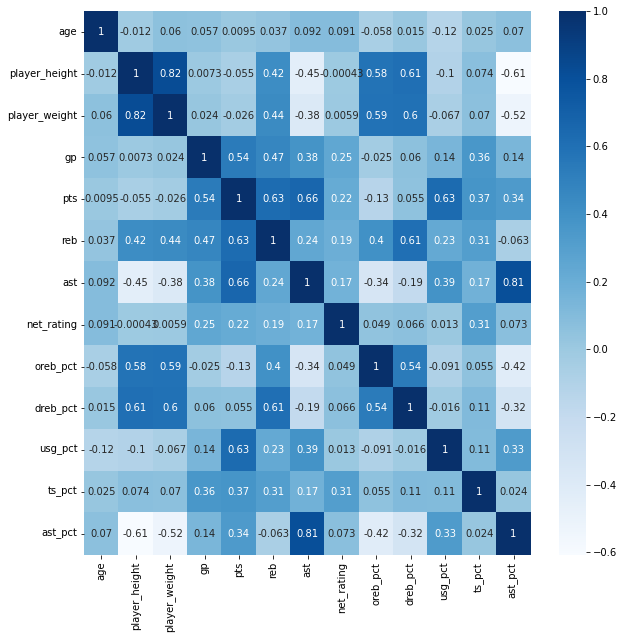

In [17]:
corr_pearson = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_pearson, cmap="Blues", annot=True)

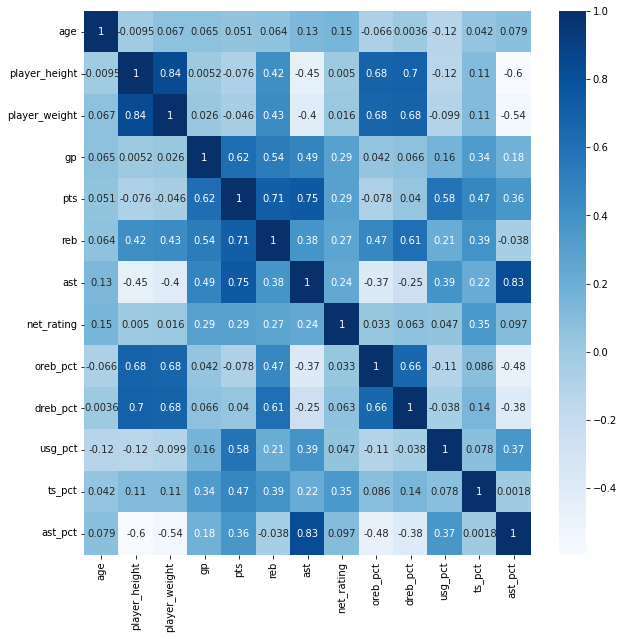

In [18]:
corr_spearman = df.corr(method='spearman')

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_spearman, cmap="Blues", annot=True)

Dessa forma, conseguimos observar forte correlação entre as variáveis altura e peso, entre altura e peso e as estatísticas de rebote (offensive e defensive rebound percentage), entre assistências e assist percentage, entre pontos e rebotes e pontos e assistências, entre outras.

### 🌎 Países dos jogadores
Investigando a nacionalidade dos jogadores (excluindo os Estados Unidos)

In [33]:
countries = df[df['country'] != 'USA'].groupby(by='country').count()

In [38]:
countries = countries.sort_values(by=['player_name'], ascending=False)

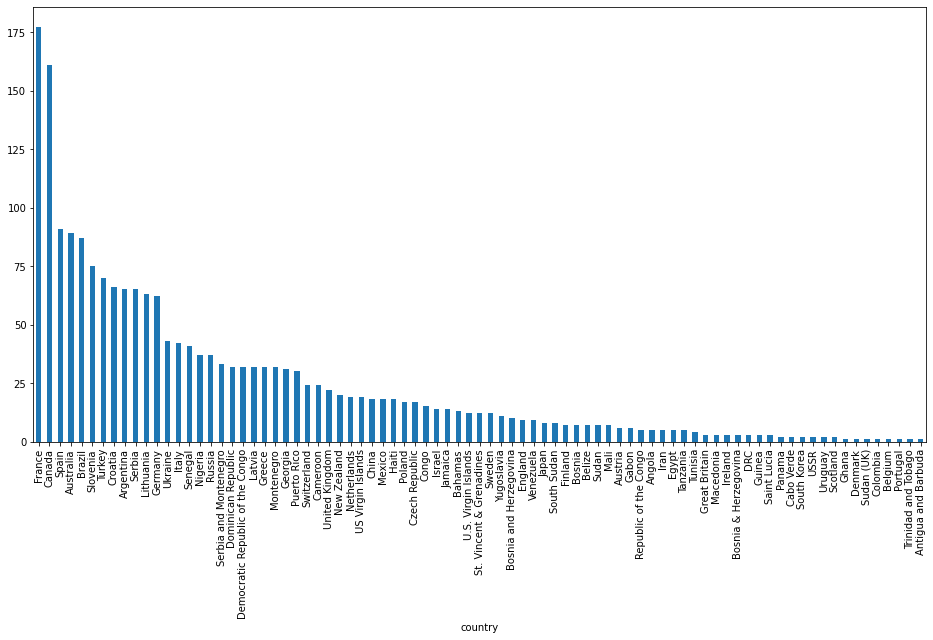

In [41]:
countries['player_name'].plot.bar(sharey=True, figsize=(16,8))

Assim, conseguimos observar que as nacionalidades mais comuns em jogadores estrangeiros são França, Canadá, Espanha, Austrália e Brasil! Além disso, é possível observar que temos algumas entradas duplicadas escritas de forma diferente como 'Bosnia and Herzegovina' e 'Bosnia & Herzegovina', 'Democratic Republic of the Congo' e 'DRC' entre outras.

### ⛹️‍♂️ Estatísticas de performance dos jogadores

Inicialmente, buscamos investigar a relação entre pontuação e eficiência (True Shooting)

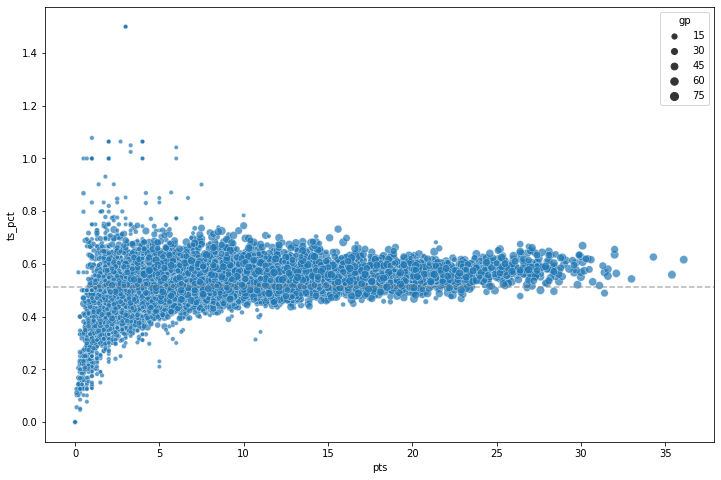

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
ts_mean = df['ts_pct'].mean()
pts_x_ts = sns.scatterplot(data=df, x='pts', y='ts_pct', size='gp', alpha=0.7)
pts_x_ts.axhline(ts_mean, linestyle='--', color='gray', alpha=0.6)
plt.show()

Conseguimos observar a partir da figura que raramente jogadores conseguem passar dos 30 pontos por jogo e também que os jogadores mais prolíficos também são mais eficientes em relação à média da liga (representada pela linha horizontal tracejada).

Analisando os jogadores mais prolíficos e as temporadas

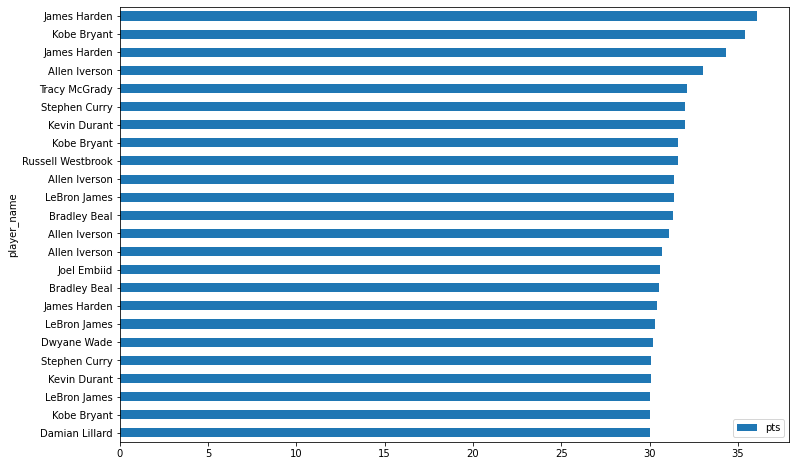

In [67]:
df_over_30_ppg = df[df['pts'] >= 30.0]
df_over_30_ppg = df_over_30_ppg.sort_values(by='pts', ascending=True)

df_over_30_ppg.plot.barh(x='player_name', y='pts', figsize=(12,8))

In [68]:
df_over_30_ppg['player_name'].value_counts()

Allen Iverson        4
Kobe Bryant          3
LeBron James         3
James Harden         3
Kevin Durant         2
Stephen Curry        2
Bradley Beal         2
Damian Lillard       1
Dwyane Wade          1
Joel Embiid          1
Russell Westbrook    1
Tracy McGrady        1
Name: player_name, dtype: int64

In [72]:
df_over_30_seasons = df_over_30_ppg.groupby(by='season').count()
df_over_30_seasons = df_over_30_seasons.sort_values(by='player_name')

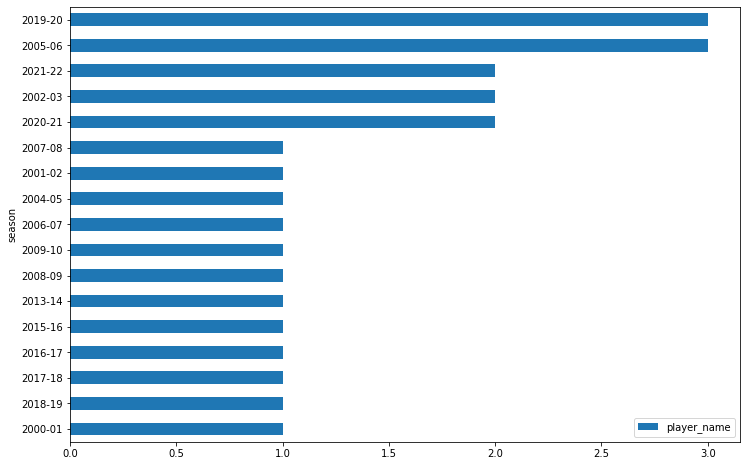

In [73]:
df_over_30_seasons.plot.barh(y='player_name', figsize=(12,8))

Assim, conseguimos visualizar que apenas 12 jogadores atingiram o feito de 30 pontos por jogo em uma temporada da NBA (entre 1996 e 2022) e que as temporadas 19-20 e 05-06 foram as que proporcionaram mais jogadores atingindo tal marca, com Harden, Beal e Lillard e Bryant, Iverson e LeBron James, respectivamente.

## 💻Pré-processamento

In [ ]:
df.shape

(12512, 21)

In [ ]:
df.head(15)

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Travis Knight,LAL,22.0,213.36,106.594120,Connecticut,USA,1996,1,29,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,Matt Fish,MIA,27.0,210.82,106.594120,North Carolina-Wilmington,USA,1992,2,50,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,Matt Bullard,HOU,30.0,208.28,106.594120,Iowa,USA,Undrafted,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,Marty Conlon,BOS,29.0,210.82,111.130040,Providence,USA,Undrafted,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,Martin Muursepp,DAL,22.0,205.74,106.594120,None,USA,1996,1,25,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97
5,Martin Lewis,TOR,22.0,198.12,102.058200,Seward County Community College,USA,1995,2,50,...,1.6,0.7,0.4,-3.5,0.087,0.045,0.135,0.470,0.125,1996-97
6,Mark West,CLE,36.0,208.28,111.583632,Old Dominion,USA,1983,2,30,...,3.2,2.7,0.3,3.5,0.092,0.146,0.137,0.555,0.034,1996-97
7,Mark Strickland,MIA,26.0,208.28,99.790240,Temple,USA,Undrafted,Undrafted,Undrafted,...,2.0,1.2,0.0,-17.1,0.109,0.152,0.232,0.448,0.013,1996-97
8,Mark Price,GSW,33.0,182.88,81.646560,Georgia Tech,USA,1986,2,25,...,11.3,2.6,4.9,-3.1,0.023,0.088,0.192,0.597,0.289,1996-97
9,Mark Jackson,IND,32.0,190.50,83.914520,St. John's (NY),USA,1987,1,18,...,9.9,4.8,11.4,-2.0,0.035,0.116,0.155,0.525,0.464,1996-97


###🔢Definição de tipos

Alguns tipos das colunas do dataframe não estão de acordo com seus dados (o tipo `string` é mapeado para `object`).

- Draft year
  - Ano de recrutamento do jogador para ingressar na NBA, deveria ser numérico
- Draft round
  - Rodada do draft em que o jogador foi recrutado, deveria ser numérico
- Draft number
  - Número que identifica a posição de seleção do jogador dentre os 60 de cada draft, deveria ser numérico

Há também um caso especial de representação da informação:

- Season
  - A coluna season é representada como uma string no formato `<ano_de_inicio_da_temp>-<ano_final_da_temp>`, mas poderia ser representada por dois valores numéricos (ano de início e ano de fim da temporada).



In [ ]:
df.dtypes

player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

In [ ]:
df['player_name'] = df['player_name'].astype('category')
df['team_abbreviation'] = df['team_abbreviation'].astype('category')
df['college'] = df['college'].astype('category')
df['country'] = df['country'].astype('category')
df['season'] = df['season'].astype('category')

#### Colunas draft_year, draft_round e draft_number

Possuem dados faltantes (nan/null)

In [ ]:
print(df.draft_year.isnull().any(), df.draft_round.isnull().any(), df.draft_number.isnull().any())

True True True


As 3 colunas são nulas conjuntamente

In [ ]:
df[df.draft_year.isnull() & df.draft_round.isnull() & df.draft_number.isnull()].shape  # ocorrencias com valor nan em draft_year & round & number

(255, 21)

In [ ]:
df[df.draft_year.isnull() | df.draft_round.isnull() | df.draft_number.isnull()].shape  # ocorrencias com valor nan em draft_year | round | number

(255, 21)

Além de valores numéricos ou nulos, há também a string 'Undrafted' em algumas amostras das 3 colunas.
Um jogador undrafted numa temporada é um jogador que não foi recrutado no draft, o que é uma informação relevante para a base. No entanto, essa informação pode ser transferida para uma outra coluna binária, permitindo que as demais tenham seus tipos melhor definidos.

In [ ]:
print(df.draft_year.unique(), '\n\n', df.draft_round.unique(), '\n\n', df.draft_number.unique())

['1996' '1992' 'Undrafted' '1995' '1983' '1986' '1987' '1988' '1985'
 '1990' '1993' '1991' '1989' '1984' '1994' '1978' '1982' '1981' '1976'
 '1980' '1979' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '1963' '2012' '2013'
 '2014' '2015' '2016' '2017' '2018' '2019' '2020' '2020.0' '2013.0'
 '2017.0' '2021.0' '2006.0' '2019.0' '2018.0' nan '2015.0' '2014.0'
 '2003.0' '2004.0' '2008.0' '2012.0' '2016.0' '2011.0' '2009.0' '2010.0'
 '2007.0' '2001.0' '2005.0'] 

 ['1' '2' 'Undrafted' '7' '3' '6' '4' '8' '0' '1.0' nan '2.0'] 

 ['29' '50' 'Undrafted' '25' '30' '18' '31' '48' '21' '160' '2' '46' '14'
 '44' '3' '28' '7' '13' '42' '52' '1' '9' '22' '8' '37' '11' '12' '33'
 '24' '5' '69' '35' '10' '38' '16' '6' '39' '32' '4' '19' '23' '36' '63'
 '20' '41' '26' '47' '15' '124' '43' '51' '40' '56' '17' '54' '139' '127'
 '27' '75' '165' '45' '57' '53' '34' '49' '79' '58' '66' '87' '120' '55'
 '82' '60' '59' '78' '0' '20.0' '12.0' '14.0' '3

O valore 'Undrafted' pode aparecer separadamente em uma das 3 colunas relacionadas ao draft (year, round, number).

In [ ]:
df[(df.draft_year == 'Undrafted') & ((df.draft_round == 'Undrafted') & (df.draft_number == 'Undrafted'))].shape  # ocorrencias com valor Undrafted em draft_year & round & number

(2057, 21)

In [ ]:
df[(df.draft_year == 'Undrafted') | ((df.draft_round == 'Undrafted') | (df.draft_number == 'Undrafted'))].shape  # ocorrencias com valor Undrafted em draft_year | round | number

(2096, 21)

Criação de nova coluna binária undrafted

In [ ]:
def get_undrafted_value(draft_year, draft_round, draft_number):
  if draft_year == 'Undrafted' or draft_round == 'Undrafted' or draft_number == 'Undrafted': return 1 # represents undrafted players
  elif np.isnan(float(draft_year)) and np.isnan(float(draft_round)) and np.isnan(float(draft_number)): return np.nan # represents unavailable info
  else: return 0 # represents a drafted player

undrafted_column_values = df.apply(lambda x: get_undrafted_value(x['draft_year'], x['draft_round'], x['draft_number']), axis=1).to_numpy()
undrafted_column_values

array([ 0.,  0.,  1., ..., nan,  0.,  0.])

In [ ]:
df['undrafted'] = undrafted_column_values

In [ ]:
df['undrafted'].dtype # type float includes NaN

dtype('float64')

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,0.0
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,0.0
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,...,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,1.0
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,...,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,1.0
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,0.0


Removendo o valor 'Undrafted' das colunas draft_year, draft_round e draft_number e substituindo por NaN.

In [ ]:
df.replace(to_replace='Undrafted', value=np.nan, inplace=True)
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,...,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,0.0
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,...,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,0.0
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaN,NaN,NaN,...,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,1.0
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaN,NaN,NaN,...,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,1.0
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,...,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,0.0


Redefinindo tipos das colunas

In [ ]:
df = df.astype({"draft_year": float, "draft_round": float, "draft_number": float}) # usamos float ao inves de int porque o nan é tido como um float

In [ ]:
df.dtypes

player_name          category
team_abbreviation    category
age                   float64
player_height         float64
player_weight         float64
college              category
country              category
draft_year            float64
draft_round           float64
draft_number          float64
gp                      int64
pts                   float64
reb                   float64
ast                   float64
net_rating            float64
oreb_pct              float64
dreb_pct              float64
usg_pct               float64
ts_pct                float64
ast_pct               float64
season               category
undrafted             float64
dtype: object

#### Coluna season

Verificando formato dos valores da coluna

In [ ]:
df.season.unique()

['1996-97', '1997-98', '1998-99', '1999-00', '2000-01', ..., '2017-18', '2018-19', '2019-20', '2020-21', '2021-22']
Length: 26
Categories (26, object): ['1996-97', '1997-98', '1998-99', '1999-00', ..., '2018-19', '2019-20',
                          '2020-21', '2021-22']

Obtendo valores para novas colunas

In [ ]:
def get_season_start_year(val):
  return int(val.split('-')[0])

def get_season_end_year(val):
  return get_season_start_year(val) + 1

season_start_year_values = df.season.apply(get_season_start_year).to_numpy()
season_end_year_values = df.season.apply(get_season_end_year).to_numpy()

Adicionando novas colunas season_start_year e season_end_year ao dataframe.

In [ ]:
df['season_start_year'] = season_start_year_values
df['season_end_year'] = season_end_year_values

In [ ]:
df.dtypes

player_name          category
team_abbreviation    category
age                   float64
player_height         float64
player_weight         float64
college              category
country              category
draft_year            float64
draft_round           float64
draft_number          float64
gp                      int64
pts                   float64
reb                   float64
ast                   float64
net_rating            float64
oreb_pct              float64
dreb_pct              float64
usg_pct               float64
ts_pct                float64
ast_pct               float64
season               category
undrafted             float64
season_start_year       int64
season_end_year         int64
dtype: object

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996.0,1.0,29.0,...,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,0.0,1996,1997
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992.0,2.0,50.0,...,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,0.0,1996,1997
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaN,NaN,NaN,...,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,1.0,1996,1997
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaN,NaN,NaN,...,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,1.0,1996,1997
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996.0,1.0,25.0,...,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,0.0,1996,1997


###❌Tratamento de dados ausentes

Atributos que contêm dados faltantes

- College
  - Universidade de origem do jogador
  - Um jogador pode não estar associado a uma universidade
  - Pode se tratar de uma informação faltante
- Draft year
  - Ano de recrutamento do jogador para ingressar na NBA
  - O jogador pode ser Undrafted (draf_year = nan)
  - Ou é uma informação faltante (draft_year = nan, undrafted = nan)
- Draft round
  - Rodada do draft em que o jogador foi recrutado
  - O jogador pode ser Undrafted (draf_round = nan)
  - Ou é uma informação faltante (draft_round = nan, undrafted = nan)
- Draft number
  - Número que identifica a posição de seleção do jogador dentre os 60 do draft
  - O jogador pode ser Undrafted (draf_number = nan)
  - Ou é uma informação faltante (draft_number = nan, undrafted = nan)
- Undrafted
  - Indica se o jogador não foi recrutado num draft até a temporada corrente
  - Valor 1 indica que é undrafted, valor 0 indica que não é undrafted (draft_year != nan)
  - Pode se tratar de uma informação faltante
- True shooting percentage (ts_pct)
  - ["No basquete, a porcentagem real de arremessos é uma estatística avançada que mede a eficiência de um jogador ao arremessar a bola"](https://https://en.wikipedia.org/wiki/True_shooting_percentage)
  - Pode se tratar de uma informação faltante

In [ ]:
df.isnull().any()

player_name          False
team_abbreviation    False
age                  False
player_height        False
player_weight        False
college               True
country              False
draft_year            True
draft_round           True
draft_number          True
gp                   False
pts                  False
reb                  False
ast                  False
net_rating           False
oreb_pct             False
dreb_pct             False
usg_pct              False
ts_pct                True
ast_pct              False
season               False
undrafted             True
season_start_year    False
season_end_year      False
dtype: bool

In [ ]:
df.describe()

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,undrafted,season_start_year,season_end_year
count,12512.000000,12512.000000,12512.000000,10200.000000,10163.000000,10161.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.000000,12512.00000,12499.000000,12512.000000,12257.000000,12512.000000,12512.000000
mean,27.061861,200.585235,100.298150,2003.636765,1.304930,21.891448,50.742887,8.146140,3.549816,1.810989,-2.318958,0.054919,0.141927,0.18504,0.511478,0.131063,0.171004,2009.264146,2010.264146
std,4.330393,9.147448,12.467724,8.793283,0.506601,16.077847,25.316104,5.968489,2.479556,1.795061,12.964088,0.044557,0.063785,0.05367,0.101511,0.094488,0.376528,7.691082,7.691082
min,18.000000,160.020000,60.327736,1963.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-252.200000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1996.000000,1997.000000
25%,24.000000,193.040000,90.718400,1997.000000,1.000000,9.000000,30.000000,3.500000,1.800000,0.600000,-6.400000,0.021000,0.097000,0.14900,0.480000,0.065000,0.000000,2003.000000,2004.000000
50%,26.000000,200.660000,99.790240,2004.000000,1.000000,19.000000,57.000000,6.700000,3.000000,1.200000,-1.300000,0.041000,0.132000,0.18100,0.524000,0.103000,0.000000,2010.000000,2011.000000
75%,30.000000,208.280000,108.862080,2011.000000,2.000000,33.000000,73.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.181000,0.21700,0.561000,0.178000,0.000000,2016.000000,2017.000000
max,44.000000,231.140000,163.293120,2021.000000,8.000000,165.000000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.00000,1.500000,1.000000,1.000000,2021.000000,2022.000000


#### Tratando colunas relacionadas ao draft

In [ ]:
len(df[df['undrafted'].isnull()])

255

In [ ]:
len(df[df['undrafted'].isnull() & df['draft_year'].isnull() & df['draft_round'].isnull() & df['draft_number'].isnull()])

255

In [ ]:
df[df['undrafted'].isnull() & df['draft_year'].isnull() & df['draft_round'].isnull() & df['draft_number'].isnull()]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year
11710,Jose Alvarado,NOP,23.0,183.0,81.0,Georgia Tech,USA,NaN,NaN,NaN,...,11.7,0.032,0.102,0.184,0.520,0.269,2021-22,NaN,2021,2022
11720,Ryan Arcidiacono,NYK,27.0,190.0,88.0,Villanova,USA,NaN,NaN,NaN,...,-7.7,0.000,0.115,0.086,0.667,0.075,2021-22,NaN,2021,2022
11726,Joel Ayayi,WAS,21.0,196.0,81.0,Gonzaga,France,NaN,NaN,NaN,...,3.5,0.056,0.109,0.133,0.167,0.254,2021-22,NaN,2021,2022
11737,Cat Barber,ATL,27.0,188.0,86.0,NC State,USA,NaN,NaN,NaN,...,34.0,0.085,0.167,0.227,0.000,0.267,2021-22,NaN,2021,2022
11742,Paris Bass,PHO,26.0,203.0,90.0,Detroit Mercy,USA,NaN,NaN,NaN,...,4.8,0.315,0.299,0.546,0.436,0.000,2021-22,NaN,2021,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12501,Moses Wright,TOT,23.0,206.0,105.0,Georgia Tech,USA,NaN,NaN,NaN,...,-25.1,0.079,0.159,0.171,0.470,0.168,2021-22,NaN,2021,2022
12502,Moses Wright,LAC,23.0,206.0,105.0,Georgia Tech,USA,NaN,NaN,NaN,...,16.5,0.000,0.000,0.000,NaN,1.000,2021-22,NaN,2021,2022
12503,Moses Wright,DAL,23.0,206.0,105.0,Georgia Tech,USA,NaN,NaN,NaN,...,-28.3,0.085,0.171,0.184,0.470,0.104,2021-22,NaN,2021,2022
12504,Gabe York,IND,28.0,190.0,83.0,Arizona,USA,NaN,NaN,NaN,...,-6.7,0.000,0.108,0.208,0.435,0.251,2021-22,NaN,2021,2022


Ou seja, nota-se que todas as ocorrências de valores faltantes na coluna undrafted se tratam de valores faltantes também nas colunas relacionadas ao draft. Além disso, como todas as ocorrências estão no range de valores preenchidos utilizando o BasketballReference, concluímos que trata-se de jogares não draftados de fato.

In [ ]:
df.loc[df['undrafted'].isnull(), ['undrafted']] = 1

In [ ]:
df['undrafted'].isnull().any()

False

Agora tratando as colunas draft round, year e number separadamente

In [ ]:
df['draft_number'].isnull().sum(), df['draft_round'].isnull().sum(), df['draft_year'].isnull().sum()

(2351, 2349, 2312)

Entendendo se há valores nulos nas colunas de draft quando a coluna undrafted é igual a 0:

In [ ]:
df[(df['draft_year'].isnull() | df['draft_round'].isnull() | df['draft_year'].isnull()) & (df['undrafted'] == 0.0)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year


Como não há valores nulos em `draft_year`, `draft_round` e `draft_number` quando `undrafted=0`, então todos os dados faltantes nas 3 colunas estão representados pela coluna undrafted e as colunas e não precisam de tratamento.

Entendendo se há valores não nulos nas colunas de draft quando a coluna undrafted é igual a 1:

In [ ]:
df[(df['draft_year'].notnull() | df['draft_round'].notnull() | df['draft_year'].notnull()) & (df['undrafted'] == 1.0)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year
376,Ivano Newbill,ATL,26.0,208.28,111.130040,Georgia Tech,USA,1994.0,NaN,NaN,...,2.5,0.104,0.189,0.083,0.439,0.042,1996-97,1.0,1996,1997
402,Devin Gray,SAS,25.0,200.66,108.862080,Clemson,USA,1995.0,NaN,NaN,...,-42.1,0.113,0.250,0.263,0.319,0.071,1996-97,1.0,1996,1997
438,Eldridge Recasner,ATL,29.0,193.04,86.182480,Washington,USA,1992.0,NaN,NaN,...,-0.3,0.036,0.076,0.172,0.539,0.141,1996-97,1.0,1996,1997
454,Eldridge Recasner,ATL,30.0,193.04,86.182480,Washington,USA,1992.0,NaN,NaN,...,-1.9,0.027,0.087,0.186,0.563,0.143,1997-98,1.0,1997,1998
501,Ivano Newbill,VAN,27.0,208.28,111.130040,Georgia Tech,USA,1994.0,NaN,NaN,...,-9.5,0.102,0.202,0.152,0.413,0.060,1997-98,1.0,1997,1998
714,Reggie Hanson,BOS,29.0,203.20,88.450440,Kentucky,USA,1998.0,NaN,NaN,...,7.3,0.167,0.188,0.161,0.500,0.056,1997-98,1.0,1997,1998
984,Eldridge Recasner,CHH,31.0,193.04,86.182480,Washington,USA,1992.0,NaN,NaN,...,-3.8,0.035,0.095,0.172,0.552,0.232,1998-99,1.0,1998,1999
1111,Randell Jackson,WAS,23.0,210.82,97.522280,Florida State,USA,1999.0,NaN,NaN,...,-9.6,0.116,0.101,0.238,0.467,0.056,1998-99,1.0,1998,1999
1504,Randell Jackson,DAL,24.0,210.82,97.522280,Florida State,USA,1999.0,NaN,NaN,...,60.4,0.000,0.000,0.000,0.000,0.000,1999-00,1.0,1999,2000
1557,Devin Gray,HOU,28.0,200.66,108.862080,Clemson,USA,1995.0,NaN,NaN,...,-7.1,0.096,0.132,0.180,0.492,0.069,1999-00,1.0,1999,2000


Há 39 ocorrências onde os jogadores estão descritos como undrafted (`undrafted=1`) e as colunas `draft_year` e/ou `draft_round` não são nulas. 

Como todas essas ocorrências já são sobre jogadores undrafted - confirmação obtida também por pesquisa - e os demais undrafted não possuem a informação do draft_year, esses valores não nulos serão substituídos por NaN.

In [ ]:
df.loc[df['draft_year'].notnull() & (df['undrafted'] == 1.0), 'draft_year'] = np.nan
df.loc[df['draft_round'].notnull() & (df['undrafted'] == 1.0), 'draft_round'] = np.nan

In [ ]:
df[(df['draft_year'].notnull() | df['draft_round'].notnull() | df['draft_year'].notnull()) & (df['undrafted'] == 1.0)]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year


Agora todas as 3 colunas relacionadas a draft estão nulas conjuntamente quando o jogador é undrafted.

In [ ]:
df['draft_number'].isnull().sum(), df['draft_round'].isnull().sum(), df['draft_year'].isnull().sum()

(2351, 2351, 2351)

#### Tratando a coluna TrueShooting%

In [ ]:
df['ts_pct'].isnull().sum()

13

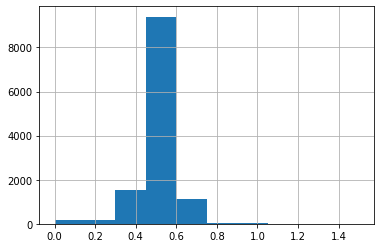

In [ ]:
df['ts_pct'].hist()

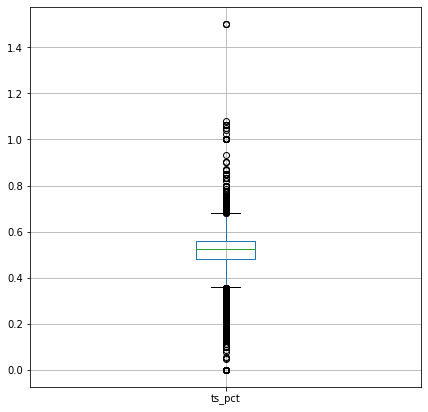

In [ ]:
df.boxplot('ts_pct', figsize=(7,7))

In [ ]:
df[df['ts_pct'].isnull()]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year
11750,Jordan Bell,CHI,27.0,203.0,97.0,Oregon,USA,2017.0,2.0,38.0,...,25.3,0.566,0.000,0.0,NaN,0.000,2021-22,0.0,2021,2022
11823,Willie Cauley-Stein,PHI,28.0,213.0,108.0,Kentucky,USA,2015.0,1.0,6.0,...,30.7,0.000,0.366,0.0,NaN,0.204,2021-22,0.0,2021,2022
11865,Sam Dekker,TOR,27.0,206.0,104.0,Wisconsin,USA,2015.0,1.0,18.0,...,-252.2,0.000,0.000,0.0,NaN,0.000,2021-22,0.0,2021,2022
11866,Javin DeLaurier,MIL,23.0,208.0,107.0,Duke,USA,NaN,NaN,NaN,...,82.6,0.000,0.346,0.0,NaN,0.000,2021-22,1.0,2021,2022
11899,Jaime Echenique,WAS,24.0,211.0,117.0,Trinity Valley CC,Colombia,NaN,NaN,NaN,...,-21.7,0.000,0.000,0.0,NaN,0.000,2021-22,1.0,2021,2022
11938,Wenyen Gabriel,BRK,24.0,206.0,92.0,Kentucky,Sudan,NaN,NaN,NaN,...,98.7,0.000,1.000,0.0,NaN,0.000,2021-22,1.0,2021,2022
11979,Tyler Hall,NYK,24.0,196.0,94.0,Montana State,USA,NaN,NaN,NaN,...,-90.3,0.000,0.000,0.0,NaN,0.000,2021-22,1.0,2021,2022
12069,DeJon Jarreau,IND,24.0,196.0,83.0,UMass,USA,NaN,NaN,NaN,...,4.1,0.000,0.000,0.0,NaN,0.000,2021-22,1.0,2021,2022
12208,C.J. Miles,BOS,34.0,198.0,99.0,NaN,USA,2005.0,2.0,34.0,...,-132.8,0.000,0.000,0.0,NaN,0.000,2021-22,0.0,2021,2022
12229,Juwan Morgan,BOS,24.0,201.0,105.0,Indiana,USA,NaN,NaN,NaN,...,90.0,0.000,0.000,0.0,NaN,0.000,2021-22,1.0,2021,2022


Devido à simetria da variável em análise (vide histograma acima), vamos utilizar a estratégia de preencher seus valores faltantes com a mediana.

In [ ]:
ts_median = df['ts_pct'].median()
ts_median

0.524

In [ ]:
df['ts_pct'] = df['ts_pct'].fillna(ts_median)

In [ ]:
df['ts_pct'].isna().sum()

0

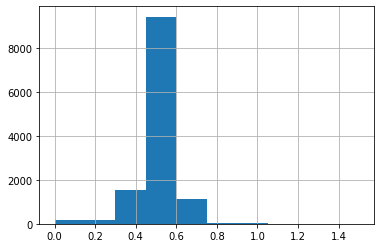

In [ ]:
df['ts_pct'].hist()

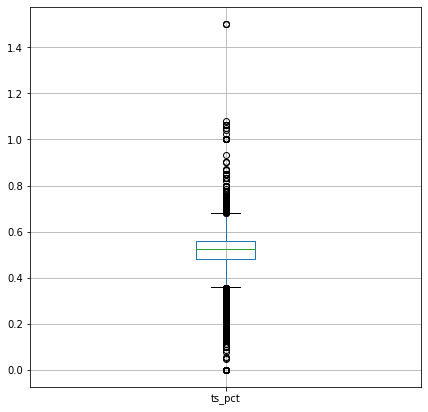

In [ ]:
df.boxplot('ts_pct', figsize=(7,7))

#### Tratando coluna 'College'

In [ ]:
df['college'].isna().sum()

95

In [ ]:
df['college'].value_counts()

None                1715
Kentucky             431
Duke                 393
North Carolina       332
UCLA                 313
                    ... 
UMass                  1
Lewis (IL)             1
Lincoln Memorial       1
UC Santa Barbara       1
UNC Wilmington         1
Name: college, Length: 382, dtype: int64

Como sabemos que tipicamente a universidade de jogadores estrangeiros não é informada (caso seja fora dos EUA) preencheremos estes com 'None' e vamos analisar apenas os jogadores americanos

In [ ]:
df[df['college'].isna() & (df['country'] == 'USA')]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year
11732,LaMelo Ball,CHO,20.0,201.0,81.0,NaN,USA,2020.0,1.0,3.0,...,1.7,0.047,0.174,0.282,0.554,0.357,2021-22,0.0,2021,2022
11747,Darius Bazley,OKC,21.0,203.0,94.0,NaN,USA,2019.0,1.0,23.0,...,-6.4,0.037,0.198,0.183,0.515,0.077,2021-22,0.0,2021,2022
11967,Jalen Green,HOU,19.0,193.0,80.0,NaN,USA,2021.0,1.0,2.0,...,-6.7,0.017,0.100,0.237,0.547,0.131,2021-22,0.0,2021,2022
11980,R.J. Hampton,ORL,20.0,193.0,79.0,NaN,USA,2020.0,1.0,24.0,...,-9.5,0.017,0.129,0.184,0.481,0.169,2021-22,0.0,2021,2022
11997,Isaiah Hartenstein,LAC,23.0,213.0,113.0,NaN,USA,2017.0,2.0,43.0,...,9.9,0.105,0.182,0.184,0.664,0.205,2021-22,0.0,2021,2022
12001,Killian Hayes,DET,20.0,196.0,88.0,NaN,USA,2020.0,1.0,7.0,...,-4.2,0.022,0.120,0.157,0.461,0.246,2021-22,0.0,2021,2022
12039,Dwight Howard,LAL,36.0,208.0,120.0,NaN,USA,2004.0,1.0,1.0,...,-4.1,0.131,0.263,0.146,0.657,0.050,2021-22,0.0,2021,2022
12068,LeBron James,LAL,37.0,206.0,113.0,NaN,USA,2003.0,1.0,1.0,...,2.1,0.033,0.204,0.323,0.619,0.306,2021-22,0.0,2021,2022
12180,Kenyon Martin Jr.,HOU,21.0,198.0,97.0,NaN,USA,2020.0,2.0,52.0,...,2.7,0.053,0.145,0.163,0.603,0.094,2021-22,0.0,2021,2022
12208,C.J. Miles,BOS,34.0,198.0,99.0,NaN,USA,2005.0,2.0,34.0,...,-132.8,0.000,0.000,0.000,0.524,0.000,2021-22,0.0,2021,2022


Após as pesquisas, concluímos que estes também não foram pro college tradicionalmente

In [ ]:
col_mode = df['college'].mode()[0]
col_mode

'None'

In [ ]:
df['college'] = df['college'].fillna(col_mode)

In [ ]:
df['college'].isna().sum()

0

In [ ]:
df.isnull().any()

player_name          False
team_abbreviation    False
age                  False
player_height        False
player_weight        False
college              False
country              False
draft_year            True
draft_round           True
draft_number          True
gp                   False
pts                  False
reb                  False
ast                  False
net_rating           False
oreb_pct             False
dreb_pct             False
usg_pct              False
ts_pct               False
ast_pct              False
season               False
undrafted            False
season_start_year    False
season_end_year      False
dtype: bool

###🧼Limpeza de dados/remoção de outliers

Vamos agora analisar atributos que caracterizam métricas sobre os jogadores:
```
'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'gp_pct'
```



#### Games played pct (gp_pct) (bivariado)

Houve anos em que as seasons tiveram menos jogos que o típico (82):
- season 2020-2021
  - 72 jogos
- season 2019-2020
  - 72 jogos
- season 2011-2012
  - 66 jogos
- season 1998-1999
  - 50 jogos

Devido a isso, alguns jogadores podem ter suas métricas muito acima ou muito abaixo do range mais comum porque jogaram poucas vezes. Por isso, uma nova coluna será calculada para cada linha de acordo com:

```markdown
games played / total games of the season
```

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996.0,1.0,29.0,...,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,0.0,1996,1997
1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992.0,2.0,50.0,...,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,0.0,1996,1997
2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaN,NaN,NaN,...,0.9,0.016,0.115,0.151,0.535,0.099,1996-97,1.0,1996,1997
3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaN,NaN,NaN,...,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97,1.0,1996,1997
4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996.0,1.0,25.0,...,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97,0.0,1996,1997


In [ ]:
seasons_games = {'1998-99': 50, '2011-12': 66, '2019-20': 72, '2020-21': 72}

In [ ]:
gp_pct_values = df.apply(lambda val: val.gp / seasons_games[val.season] if val.season in seasons_games else val.gp / 82, axis=1)
gp_pct_values

0        0.865854
1        0.073171
2        0.865854
3        0.902439
4        0.512195
           ...   
12507    0.317073
12508    0.926829
12509    0.682927
12510    0.329268
12511    0.926829
Length: 12512, dtype: float64

In [ ]:
df['gp_pct'] = gp_pct_values

Vamos agora verificar os outliers dos nossos dados com relação ao novo atributo `gp_pct`

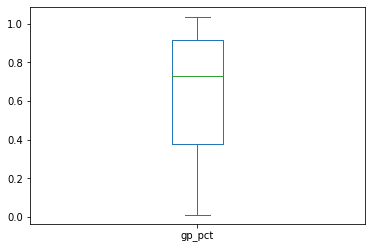

In [ ]:
df['gp_pct'].plot.box()

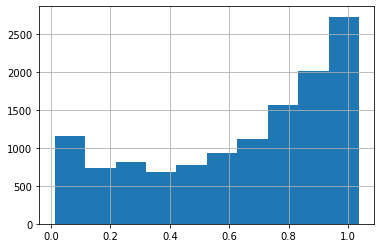

In [ ]:
df['gp_pct'].hist()

Não foram identificados outliers.

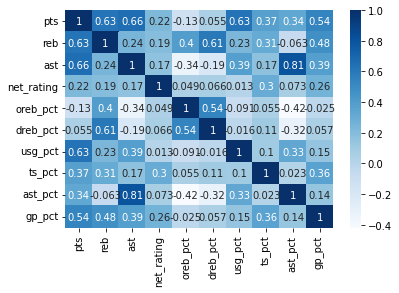

In [ ]:
# calculate the correlation matrix
corr = df[['pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'gp_pct']].corr()

# plot the heatmap
sns.heatmap(corr, cmap="Blues", annot=True)

#### True shooting (ts_pct)

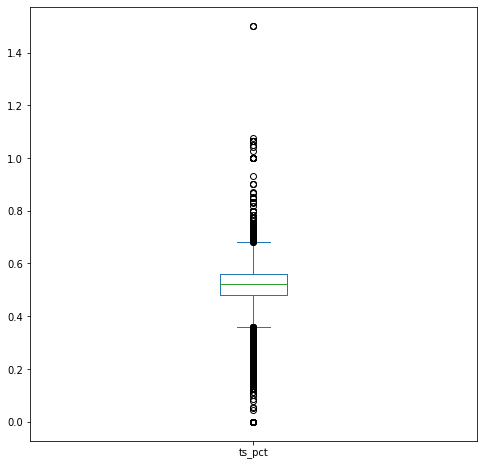

In [ ]:
df['ts_pct'].plot.box(figsize=(8,8))

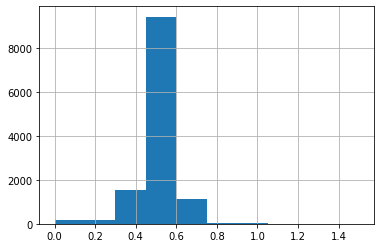

In [ ]:
df['ts_pct'].hist()

Observamos que há uma distribuição simétrica de ts_pct, mas foi detectada a presença de outliers pelo boxplot (valores mais distantes do máximo e mínimo da caixa). Para tratá-los, vamos utilizar o z-score.

In [ ]:
ts_pct_mean = df['ts_pct'].mean() # media do atributo
ts_pct_sd = df['ts_pct'].std() # desvio padrao do atributo

In [ ]:
ts_pct_outliers = df[(abs(df['ts_pct'] - ts_pct_mean) / ts_pct_sd) > 3.5] # obtendo os outliers a partir do z-score das amostras
ts_pct_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct
265,Cuonzo Martin,MIL,25.0,195.58,96.615096,Purdue,USA,1995.0,2.0,57.0,...,0.048,0.000,0.214,0.000,0.100,1996-97,0.0,1996,1997,0.036585
275,Bruce Bowen,MIA,26.0,200.66,90.718400,Cal State-Fullerton,USA,NaN,NaN,NaN,...,0.000,0.000,0.000,0.000,0.000,1996-97,1.0,1996,1997,0.012195
281,Anthony Miller,ATL,25.0,205.74,115.665960,Michigan State,USA,1994.0,2.0,39.0,...,0.111,0.714,0.149,0.000,0.000,1996-97,0.0,1996,1997,0.012195
371,James Scott,MIA,25.0,198.12,81.646560,St. John's (NY),USA,NaN,NaN,NaN,...,0.036,0.147,0.158,0.056,0.136,1996-97,1.0,1996,1997,0.097561
406,Derrick Alston,ATL,24.0,210.82,102.058200,Duquesne,USA,1994.0,2.0,33.0,...,0.188,0.200,0.213,0.000,0.000,1996-97,0.0,1996,1997,0.024390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12412,Tyrell Terry,MEM,21.0,188.00,72.000000,Stanford,USA,2020.0,2.0,31.0,...,0.000,0.000,0.137,1.000,0.000,2021-22,0.0,2021,2022,0.024390
12413,Jon Teske,MEM,24.0,216.00,120.000000,Michigan,USA,NaN,NaN,NaN,...,0.000,0.268,0.096,0.000,0.138,2021-22,1.0,2021,2022,0.036585
12439,Rayjon Tucker,TOT,24.0,190.00,94.000000,Florida Gulf Coast,USA,NaN,NaN,NaN,...,0.047,0.075,0.079,0.869,0.181,2021-22,1.0,2021,2022,0.060976
12441,Rayjon Tucker,MIL,24.0,190.00,94.000000,Florida Gulf Coast,USA,NaN,NaN,NaN,...,0.052,0.049,0.095,0.901,0.191,2021-22,1.0,2021,2022,0.024390


Cerca de 230 amostras são outliers com relação ao ts_pct (possuem valores muito baixos ou muito acima do esperado). Por se tratar de um pequeno subconjunto dos nossos dados, essas ocorrências serão removidas.

In [ ]:
df = df[(abs(df['ts_pct'] - ts_pct_mean) / ts_pct_sd) <= 3.5]
df.reset_index(inplace=True, drop=True)

#### Net rating (net_rating)

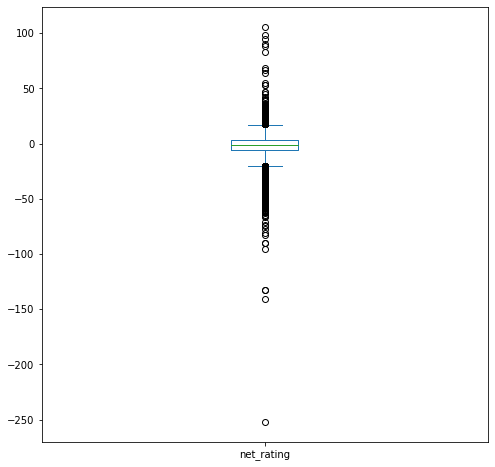

In [ ]:
df['net_rating'].plot.box(figsize=(8,8))

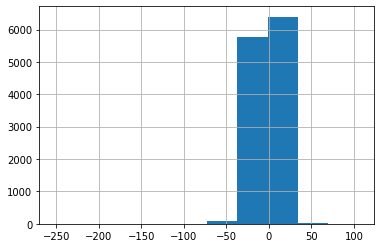

In [ ]:
df['net_rating'].hist()

Observamos que há uma distribuição simétrica de net_rating, mas foi detectada a presença de outliers pelo boxplot (valores mais distantes do máximo e mínimo da caixa). Para tratá-los, vamos tentar utilizar o método de tukey.

In [ ]:
q1 = df['net_rating'].quantile(q=0.25)
q3 = df['net_rating'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

9.425


In [ ]:
df[df['net_rating'] < (q1-1.5*iqr)].shape

(386, 25)

In [ ]:
# valore unicos de net_rating dos outliers inferiores detectados pelo metodo
df[df['net_rating'] < (q1-1.5*iqr)]['net_rating'].unique()

array([ -24. ,  -30.5,  -40.8,  -42.5,  -33.6,  -29.8,  -38.4,  -22.4,
        -24.2,  -42.1,  -53.7,  -57.4,  -47.4,  -52.7,  -36.2,  -29.9,
        -21.5,  -24.6,  -21.7,  -29.5,  -20.5,  -29.2,  -20.8,  -36.4,
        -30. ,  -38.9,  -64.9,  -23.9,  -28.8,  -65.1,  -20.4,  -21.6,
        -56.2,  -42.9,  -42.6,  -28.3,  -26.5,  -25.5,  -34. ,  -33.1,
        -23.8,  -36.1,  -29.7,  -27.2,  -21. ,  -33.4,  -25.7,  -30.9,
        -22.1,  -32.6,  -21.2,  -24.7,  -38. ,  -23.7,  -45.9,  -35. ,
        -35.2,  -22.5,  -41.6,  -25.6,  -39. ,  -23.1,  -42. ,  -20.7,
        -21.1,  -21.4,  -62.2,  -23. ,  -61.3,  -32.4,  -33.7,  -28.4,
        -38.7,  -51.9,  -22. ,  -26.2,  -46.1,  -40.5,  -66.7,  -61. ,
        -27.9,  -58.2,  -24.3,  -49. ,  -26.4,  -31.3,  -27.5,  -20.6,
        -25.2,  -27.8,  -24.4,  -34.4,  -26.6,  -26.8,  -27.7,  -23.2,
        -21.3,  -24.1,  -44.4,  -31.2,  -24.5,  -44.7, -140.5,  -44.1,
        -28.7,  -55.2,  -42.8,  -40. ,  -31.6,  -22.7,  -81. ,  -32.1,
      

In [ ]:
# valore unicos de net_rating dos outliers superiores detectados pelo metodo
df[df['net_rating'] > (q3+1.5*iqr)]['net_rating'].unique()

array([ 17.5,  20.3,  27.4,  21.3,  24.9,  26.5,  26. ,  32.6,  26.9,
        23.7,  38.9,  18.8,  22.6,  46.4,  21.1,  22.5,  20.9,  24.5,
        39.1,  19.1,  41.9,  24.6,  21.8,  94.8,  20.5,  40.4,  17.9,
        21. ,  88.5,  21.5,  18. ,  23. ,  25.3,  35.9,  31.3,  19.4,
        35.6,  19.7,  23.8,  55.3,  17.6,  25. ,  28.6,  17.7,  19.5,
        32.5,  18.1,  27.1,  29.7,  22. ,  21.2,  34.7,  32.7,  18.9,
        24.4,  18.3,  31.7,  26.8,  44.9,  18.7,  46.9,  21.6,  27.3,
        30. ,  18.4,  30.9,  26.6,  66.7,  52.8,  63.9,  25.8,  26.7,
        23.1,  22.7,  33.9,  33.3,  29.9,  20.2, 105.8,  21.7,  32.8,
        29.8,  22.1,  34.1,  30.7,  39.5,  82.6,  68.9,  31.8,  98.7,
        33.8,  53. ,  22.4,  22.2,  90. ,  27.9,  19.2,  22.3,  29.3,
        17.8,  32. ,  30.5,  18.2])

Ao utilizar o conhecimento do domínio dos dados e desse atributo específico, entendemos que os outliers detectados pelo teste de tukey na verdade contêm valores aceitáveis para net_rating. Por isso, decidimos recorrer novamente ao z-score para a detecção e remoção de outliers:

In [ ]:
net_rating_mean = df['net_rating'].mean() # media do atributo
net_rating_sd = df['net_rating'].std() # desvio padrao do atributo

In [ ]:
net_rating_outliers = df[(abs(df['net_rating'] - net_rating_mean) / net_rating_sd) > 3.5] # obtendo os outliers a partir do z-score das amostras
net_rating_outliers.shape

(128, 25)

In [ ]:
(net_rating_outliers['net_rating'].unique())

array([ -40.8,  -42.5,  -38.4,  -42.1,  -53.7,  -57.4,  -47.4,  -52.7,
        -38.9,  -64.9,  -65.1,  -56.2,  -42.9,  -42.6,   38.9,   46.4,
        -38. ,  -45.9,  -41.6,  -39. ,  -42. ,  -62.2,  -61.3,   39.1,
         41.9,  -38.7,  -51.9,  -46.1,  -40.5,   94.8,  -66.7,  -61. ,
        -58.2,   40.4,  -49. ,  -44.4,   88.5,  -44.7, -140.5,  -44.1,
        -55.2,  -42.8,  -40. ,  -81. ,   35.9,  -82.9,  -43.7,   35.6,
        -54. ,  -48.9,   55.3,  -40.1,  -75. ,  -38.8,  -40.9,  -74.1,
        -48.4,  -61.8,  -41. ,  -39.3,   34.7,  -60.3,  -71.1,  -41.8,
        -58. ,  -51.1,  -41.4,   44.9,   46.9,  -58.7,   66.7,   52.8,
        -40.7,  -95.6,   63.9,  -61.1,   33.9,   33.3,  -43.4,  -45.8,
        -50.9,  105.8,  -37.6,  -54.5,  -54.3,  -40.3,   34.1,  -90.3,
        -47.1,  -56.8,  -44.8,   39.5, -252.2,   82.6,   68.9,  -43.5,
        -45.7,  -60.1,   98.7,  -54.1, -132.8,   33.8,  -40.4,   53. ,
        -48. ,   90. ,  -44.6,  -62.4,  -48.6,  -77.5])

Cerca de 130 amostras são outliers com relação ao net_rating (possuem valores muito baixos ou muito acima do esperado). Por se tratar de um pequeno subconjunto dos nossos dados, essas ocorrências serão removidas.

In [ ]:
df = df[(abs(df['net_rating'] - net_rating_mean) / net_rating_sd) <= 3.5]
df.reset_index(inplace=True, drop=True)

#### Rebounds pct (attack and defense), Usage rate, Assists pct

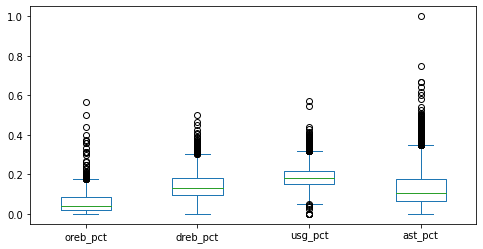

In [ ]:
df[['oreb_pct', 'dreb_pct', 'usg_pct', 'ast_pct']].plot.box(figsize=(8,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a1fc6add0>,
      dtype=object)

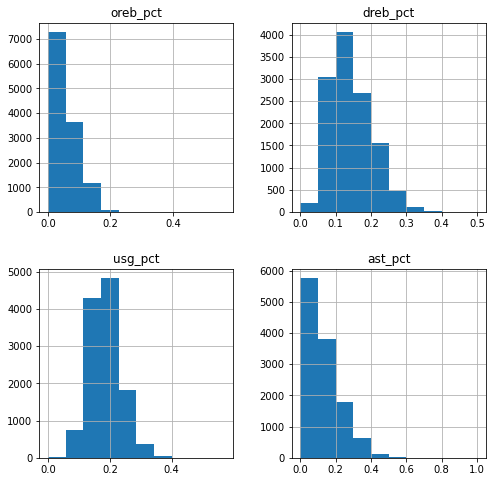

In [ ]:
df[['oreb_pct', 'dreb_pct', 'usg_pct', 'ast_pct']].hist(figsize=(8,8))

Todos os 4 atributos analisados possuem outliers em suas amostras. Além disso, com base nos histogramas, também verificamos que oreb_pct e ast_pct não têm distribuição normal e por isso também vamos ajustá-los antes de partir para a remoção dos seus outliers.

##### oreb_pct

In [ ]:
# Verificando se há valores nulos antes de aplicar o log na coluna
df['oreb_pct'].value_counts()

0.000    294
0.017    239
0.015    230
0.019    229
0.023    224
        ... 
0.212      1
0.200      1
0.269      1
0.400      1
0.232      1
Name: oreb_pct, Length: 219, dtype: int64

Cerca de 290 amostras possuem a taxa de offensive rebounds zerada. Devido a isso, testamos 3 abordagens de detecção de outliers:
- Remoção de zeros, aplicação de log e detecção com z-score robusto
- Substituição de zeros com valores pequenos, aplicação de log e detecção com z-score robusto
- Aplicação direta do z-score robusto nos dados sem distribuição simétrica

###### Remoção de zeros, aplicação de log e detecção com z-score robusto

In [ ]:
# Removendo zeros
df_non_zero = df[df['oreb_pct'] > 0]
df_non_zero.reset_index(inplace=True, drop=True)

Agora vamos finalmente aplicar o log à coluna de oreb_pct:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


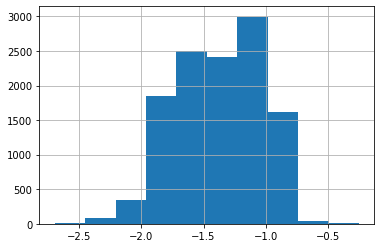

In [ ]:
df_non_zero['oreb_pct_log'] = np.log10(df_non_zero['oreb_pct'])
df_non_zero['oreb_pct_log'].hist()

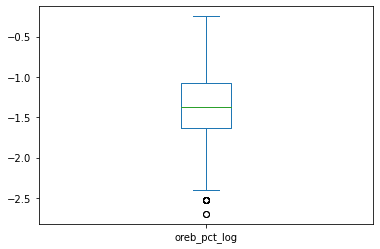

In [ ]:
df_non_zero[['oreb_pct_log']].plot.box()

Agora observamos que há uma distribuição simétrica e vamos tratar seus outliers utilizando o z-score robusto.

In [ ]:
oreb_pct_log_mad = abs(df_non_zero['oreb_pct_log'] - df_non_zero['oreb_pct_log'].median()).median()*(1/0.6745)

In [ ]:
oreb_pct_log_outliers = df_non_zero[abs(df_non_zero['oreb_pct_log']-df_non_zero['oreb_pct_log'].median())/oreb_pct_log_mad > 3] # obtendo os outliers a partir do z-score robusto
oreb_pct_log_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_log
1190,Hubert Davis,DAL,29.0,195.58,83.007336,North Carolina,USA,1992.0,1.0,20.0,...,0.072,0.162,0.545,0.108,1998-99,0.0,1998,1999,1.000000,-2.69897
2418,Dana Barros,DET,35.0,180.34,74.842680,Boston College,USA,1989.0,1.0,16.0,...,0.109,0.192,0.473,0.221,2001-02,0.0,2001,2002,0.353659,-2.69897


Apenas 2 amostras são outliers com relação ao oreb_pct_log (possuem valores muito baixos).

###### Substituição de zeros com valores pequenos, aplicação de log e detecção com z-score robusto

Cerca de 290 amostras possuem valores zerados, sendo esse o valor mais frequente na coluna. Como vamos aplicar o log nos dados na tentativa de normalizar sua distribuição, vamos substituir os valores nulos por valores muito pequenos considerando a escala do atributo em questão.

In [ ]:
# Verificando o menor valor do atributo depois do 0
df['oreb_pct'].nsmallest(295)

26       0.000
73       0.000
143      0.000
418      0.000
468      0.000
         ...  
12132    0.000
12136    0.000
12138    0.000
12140    0.000
1208     0.002
Name: oreb_pct, Length: 295, dtype: float64

In [ ]:
# Substituindo os zeros por valor muito pequeno
df['oreb_pct_non_zero'] = df['oreb_pct']
df.loc[df['oreb_pct_non_zero'] == 0,'oreb_pct_non_zero'] = 0.001

Agora vamos finalmente aplicar o log à coluna de oreb_pct:

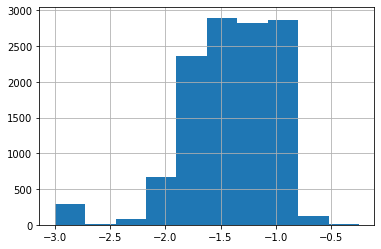

In [ ]:
df['oreb_pct_log'] = np.log10(df['oreb_pct_non_zero'])
df['oreb_pct_log'].hist()

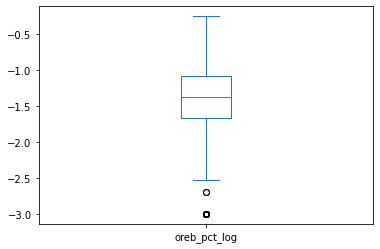

In [ ]:
df[['oreb_pct_log']].plot.box()

Agora observamos que há uma distribuição simétrica e vamos tratar seus outliers utilizando o z-score robusto.

In [ ]:
oreb_pct_log_mad = abs(df['oreb_pct_log'] - df['oreb_pct_log'].median()).median()*(1/0.6745)

In [ ]:
oreb_pct_log_outliers = df[abs(df['oreb_pct_log']-df['oreb_pct_log'].median())/oreb_pct_log_mad > 3] # obtendo os outliers a partir do z-score robusto
oreb_pct_log_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log
26,Matt Steigenga,CHI,27.0,200.66,102.05820,Michigan State,USA,1992.0,2.0,52.0,...,0.341,0.307,0.333,1996-97,0.0,1996,1997,0.024390,0.001,-3.0
73,Jimmy Carruth,MIL,27.0,208.28,120.20188,Virginia Tech,USA,NaN,NaN,NaN,...,0.103,0.727,0.000,1996-97,1.0,1996,1997,0.048780,0.001,-3.0
143,Tim Legler,WAS,30.0,193.04,90.71840,La Salle,USA,NaN,NaN,NaN,...,0.151,0.431,0.055,1996-97,1.0,1996,1997,0.182927,0.001,-3.0
418,Elmer Bennett,DEN,27.0,182.88,77.11064,Notre Dame,USA,1992.0,2.0,38.0,...,0.187,0.470,0.216,1996-97,0.0,1996,1997,0.109756,0.001,-3.0
468,Derek Grimm,SAC,23.0,205.74,104.32616,Missouri,USA,NaN,NaN,NaN,...,0.199,0.470,0.000,1997-98,1.0,1997,1998,0.109756,0.001,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12106,Tremont Waters,WAS,24.0,178.00,79.00000,LSU,USA,2019.0,2.0,51.0,...,0.111,0.500,0.000,2021-22,0.0,2021,2022,0.012195,0.001,-3.0
12132,Cassius Winston,WAS,23.0,185.00,83.00000,Michigan State,USA,2020.0,2.0,53.0,...,0.180,0.549,0.244,2021-22,0.0,2021,2022,0.085366,0.001,-3.0
12136,McKinley Wright IV,MIN,23.0,183.00,88.00000,Colorado,USA,NaN,NaN,NaN,...,0.088,0.833,0.209,2021-22,1.0,2021,2022,0.060976,0.001,-3.0
12138,Moses Wright,LAC,23.0,206.00,105.00000,Georgia Tech,USA,NaN,NaN,NaN,...,0.000,0.524,1.000,2021-22,1.0,2021,2022,0.012195,0.001,-3.0


296 amostras são outliers com relação ao oreb_pct_log (possuem valores muito baixos). O resultado obtido corresponde ao primeiro método de remover os zeros (294) antes da normalização e a partir do z-score robusto remover mais 2 ocorências (=296). Vamos tentar ainda um último terceiro método.

###### Aplicação direta do z-score robusto nos dados sem distribuição simétrica

Cerca de 290 amostras possuem valores zerados, sendo esse o valor mais frequente na coluna. Apesar do histograma apontar para uma distribuição diferente da normal, vamos testar o uso direto do z-score robusto para detecção de outliers, dado o dilema das duas abordagens anteriores sobre como lidar com os valores zerados.

In [ ]:
oreb_pct_mad = abs(df['oreb_pct'] - df['oreb_pct'].median()).median()*(1/0.6745)

In [ ]:
oreb_pct_outliers = df[abs(df['oreb_pct']-df['oreb_pct'].median())/oreb_pct_mad > 3] # obtendo os outliers a partir do z-score robusto
oreb_pct_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log
18,Malik Rose,CHH,22.0,200.66,113.39800,Drexel,USA,1996.0,2.0,44.0,...,0.161,0.515,0.089,1996-97,0.0,1996,1997,0.658537,0.169,-0.772113
68,Joe Stephens,HOU,24.0,200.66,95.25432,Arkansas-Little Rock,USA,NaN,NaN,NaN,...,0.279,0.300,0.000,1996-97,1.0,1996,1997,0.024390,0.250,-0.602060
88,Larry Krystkowiak,LAL,32.0,205.74,99.79024,Montana,USA,1986.0,2.0,28.0,...,0.140,0.521,0.273,1996-97,0.0,1996,1997,0.036585,0.182,-0.739929
133,Will Perdue,SAS,31.0,213.36,108.86208,Vanderbilt,USA,1988.0,1.0,11.0,...,0.139,0.582,0.033,1996-97,0.0,1996,1997,0.792683,0.155,-0.809668
192,Shawnelle Scott,CLE,25.0,210.82,113.39800,St. John's (NY),USA,1994.0,2.0,43.0,...,0.191,0.480,0.000,1996-97,0.0,1996,1997,0.195122,0.160,-0.795880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12015,Chris Silva,MIA,25.0,203.00,106.00000,South Carolina,Gabon,NaN,NaN,NaN,...,0.143,0.641,0.109,2021-22,1.0,2021,2022,0.109756,0.170,-0.769551
12016,Marko Simonovic,CHI,22.0,211.00,97.00000,None,Montenegro,2020.0,2.0,44.0,...,0.275,0.428,0.000,2021-22,0.0,2021,2022,0.109756,0.162,-0.790485
12029,Jalen Smith,PHO,21.0,208.00,97.00000,Maryland,USA,2020.0,1.0,10.0,...,0.205,0.547,0.021,2021-22,0.0,2021,2022,0.353659,0.159,-0.798603
12065,Tristan Thompson,SAC,30.0,206.00,115.00000,Texas,USA,2011.0,1.0,4.0,...,0.195,0.521,0.059,2021-22,0.0,2021,2022,0.365854,0.171,-0.767004


176 amostras são outliers com relação ao oreb_pct_log (possuem valores em tese acima do esperado), mas na verdade essas ocorrências não correspondem a outliers, e sim a jogadores que se destacam na métrica (conhecimento do domínio).

###### Conclusão

Após testar as 3 abordagens, os resultados mais razoáveis na detecção de outliers quando há amostras zeradas foram obtidos com a remoção dos zeros antes da normalização. Por isso, esse método será adotado para os futuros cenários semelhantes, se existirem.

Vamos aplicar a abordagem escolhida:

In [ ]:
# Removendo zeros
df = df[df['oreb_pct'] > 0]
df.reset_index(inplace=True, drop=True)

In [ ]:
# Aplicando o log
df['oreb_pct_log'] = np.log10(df['oreb_pct'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Outliers (z-score robusto)
oreb_pct_log_mad = abs(df['oreb_pct_log'] - df['oreb_pct_log'].median()).median()*(1/0.6745)
oreb_pct_log_outliers = df[abs(df['oreb_pct_log']-df['oreb_pct_log'].median())/oreb_pct_log_mad > 3] # obtendo os outliers a partir do z-score robusto
oreb_pct_log_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log
1190,Hubert Davis,DAL,29.0,195.58,83.007336,North Carolina,USA,1992.0,1.0,20.0,...,0.162,0.545,0.108,1998-99,0.0,1998,1999,1.000000,0.002,-2.69897
2418,Dana Barros,DET,35.0,180.34,74.842680,Boston College,USA,1989.0,1.0,16.0,...,0.192,0.473,0.221,2001-02,0.0,2001,2002,0.353659,0.002,-2.69897


In [ ]:
# Removendo outliers
df = df[abs(df['oreb_pct_log']-df['oreb_pct_log'].median())/oreb_pct_log_mad <= 3]
df.reset_index(inplace=True, drop=True)

##### ast_pct

In [ ]:
# Verificando se há valores nulos antes de aplicar o log na coluna
df['ast_pct'].value_counts()

0.000    162
0.068    112
0.063    107
0.077    100
0.074     98
        ... 
0.413      1
0.438      1
0.415      1
0.491      1
0.641      1
Name: ast_pct, Length: 474, dtype: int64

Cerca de 160 amostras possuem ast_pct zerada, sendo esse o valor mais frequente na coluna. Como decidimos aplicar o log nos dados na tentativa de normalizar sua distribuição, vamos remover os valores nulos existentes.

In [ ]:
# Removendo zeros
df = df[df['ast_pct'] > 0]
df.reset_index(inplace=True, drop=True)

Agora vamos finalmente aplicar o log:

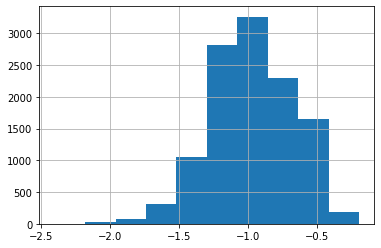

In [ ]:
df['ast_pct_log'] = np.log10(df['ast_pct'])
df['ast_pct_log'].hist()

Agora observamos que há uma distribuição simétrica e vamos tratar seus outliers utilizando o z-score robusto.

In [ ]:
# Outliers (z-score robusto)
ast_pct_log_mad = abs(df['ast_pct_log'] - df['ast_pct_log'].median()).median()*(1/0.6745)
ast_pct_log_outliers = df[abs(df['ast_pct_log']-df['ast_pct_log'].median())/ast_pct_log_mad > 3]
ast_pct_log_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log
964,William Cunningham,NJN,25.0,210.82,108.862080,Temple,USA,NaN,NaN,NaN,...,0.159,0.009,1998-99,1.0,1998,1999,0.320000,0.080,-1.096910,-2.045757
1007,Brian Skinner,LAC,23.0,205.74,115.665960,Baylor,USA,1998.0,1.0,22.0,...,0.503,0.007,1998-99,0.0,1998,1999,0.420000,0.085,-1.070581,-2.154902
1170,Jahidi White,WAS,23.0,205.74,131.541680,Georgetown,USA,1998.0,2.0,43.0,...,0.517,0.008,1998-99,0.0,1998,1999,0.400000,0.139,-0.856985,-2.096910
1740,Joel Przybilla,MIL,21.0,215.90,115.665960,Minnesota,USA,2000.0,1.0,9.0,...,0.339,0.011,2000-01,0.0,2000,2001,0.402439,0.115,-0.939302,-1.958607
1980,Soumaila Samake,NJN,23.0,213.36,101.604608,None,Mali,2000.0,2.0,36.0,...,0.393,0.008,2000-01,0.0,2000,2001,0.414634,0.104,-0.982967,-2.096910
2870,Etan Thomas,WAS,25.0,208.28,117.933920,Syracuse,USA,2000.0,1.0,12.0,...,0.550,0.010,2002-03,0.0,2002,2003,0.463415,0.144,-0.841638,-2.000000
3325,Pape Sow,TOR,23.0,208.28,113.398000,Cal State-Fullerton,Senegal,2004.0,2.0,47.0,...,0.444,0.012,2004-05,0.0,2004,2005,0.329268,0.084,-1.075721,-1.920819
3628,Jared Reiner,CHI,23.0,210.82,115.665960,Iowa,USA,NaN,NaN,NaN,...,0.331,0.011,2004-05,1.0,2004,2005,0.231707,0.094,-1.026872,-1.958607
3643,Jahidi White,CHA,29.0,205.74,131.541680,Georgetown,USA,1998.0,2.0,43.0,...,0.432,0.011,2004-05,0.0,2004,2005,0.207317,0.095,-1.022276,-1.958607
3812,Ha Ha,POR,20.0,220.98,138.345560,Yonsei (KOR),South Korea,2004.0,2.0,46.0,...,0.572,0.008,2005-06,0.0,2005,2006,0.329268,0.073,-1.136677,-2.096910


In [ ]:
# Removendo outliers
df = df[abs(df['ast_pct_log']-df['ast_pct_log'].median())/ast_pct_log_mad <= 3]
df.reset_index(inplace=True, drop=True)

##### dreb_pct

Como observamos que há uma distribuição simétrica, já vamos tratar seus outliers utilizando o z-score robusto.

In [ ]:
# Outliers (z-score robusto)
dreb_pct_mad = abs(df['dreb_pct'] - df['dreb_pct'].median()).median()*(1/0.6745)
dreb_pct_outliers = df[abs(df['dreb_pct']-df['dreb_pct'].median())/dreb_pct_mad > 3]
dreb_pct_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log
391,Dennis Rodman,CHI,36.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986.0,2.0,27.0,...,0.479,0.113,1996-97,0.0,1996,1997,0.670732,0.186,-0.730487,-0.946922
462,Dennis Rodman,CHI,37.0,198.12,99.79024,Southeastern Oklahoma State,USA,1986.0,2.0,27.0,...,0.459,0.112,1997-98,0.0,1997,1998,0.975610,0.169,-0.772113,-0.950782
481,Jason Lawson,ORL,23.0,210.82,108.86208,Villanova,USA,1997.0,2.0,41.0,...,0.670,0.083,1997-98,0.0,1997,1998,0.207317,0.104,-0.982967,-1.080922
844,Danny Fortson,DEN,23.0,200.66,117.93392,Cincinnati,USA,1997.0,1.0,10.0,...,0.564,0.038,1998-99,0.0,1998,1999,1.000000,0.167,-0.777284,-1.420216
855,Dennis Rodman,LAL,38.0,200.66,95.25432,Southeastern Oklahoma State,USA,1986.0,2.0,27.0,...,0.388,0.063,1998-99,0.0,1998,1999,0.460000,0.114,-0.943095,-1.200659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11450,Eugene Omoruyi,DAL,24.0,201.00,110.00000,Rutgers University,Nigeria,NaN,NaN,NaN,...,0.518,0.158,2021-22,1.0,2021,2022,0.048780,0.123,-0.910095,-0.801343
11596,Jonas Valančiūnas,NOP,29.0,211.00,120.00000,None,Lithuania,2011.0,1.0,5.0,...,0.617,0.140,2021-22,0.0,2021,2022,0.902439,0.109,-0.962574,-0.853872
11603,Nikola Vučević,CHI,31.0,208.00,117.00000,USC,Switzerland,2011.0,1.0,16.0,...,0.533,0.152,2021-22,0.0,2021,2022,0.890244,0.066,-1.180456,-0.818156
11637,D.J. Wilson,TOR,25.0,208.00,104.00000,Michigan,USA,2017.0,1.0,17.0,...,0.773,0.146,2021-22,0.0,2021,2022,0.048780,0.019,-1.721246,-0.835647


Apesar de terem sido reconhecidos 90 outliers, por conhecimento do domínio dos dados, foi percebido que as amostras na verdade se tratam de jogadores que se destacam na métrica em questão. Portanto, essas ocorrências não serão removidas do dataset.

##### usg_pct

Como observamos que há uma distribuição simétrica, já vamos tratar seus outliers utilizando o z-score robusto.

In [ ]:
# Outliers (z-score robusto)
usg_pct_mad = abs(df['usg_pct'] - df['usg_pct'].median()).median()*(1/0.6745)
usg_pct_outliers = df[abs(df['usg_pct']-df['usg_pct'].median())/usg_pct_mad > 3]
usg_pct_outliers

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log
45,Michael Jordan,CHI,34.0,198.12,97.975872,North Carolina,USA,1984.0,1.0,3.0,...,0.567,0.208,1996-97,0.0,1996,1997,1.000000,0.042,-1.376751,-0.681937
225,Charles Jones,HOU,40.0,205.74,97.522280,Albany State (GA),USA,1979.0,8.0,165.0,...,0.400,0.046,1996-97,0.0,1996,1997,0.146341,0.068,-1.167491,-1.337242
241,David Robinson,SAS,31.0,215.90,106.594120,Navy,USA,1987.0,1.0,1.0,...,0.559,0.111,1996-97,0.0,1996,1997,0.073171,0.161,-0.793174,-0.954677
485,Horacio Llamas,PHX,24.0,210.82,129.273720,Grand Canyon,USA,NaN,NaN,NaN,...,0.472,0.034,1997-98,1.0,1997,1998,0.097561,0.108,-0.966576,-1.468521
628,Shaquille O'Neal,LAL,26.0,215.90,142.881480,Louisiana State,USA,1992.0,1.0,1.0,...,0.587,0.125,1997-98,0.0,1997,1998,0.731707,0.114,-0.943095,-0.903090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,Paul George,LAC,31.0,203.00,99.000000,Fresno State,USA,2010.0,1.0,10.0,...,0.538,0.281,2021-22,0.0,2021,2022,0.378049,0.012,-1.920819,-0.551294
11365,Boban Marjanović,DAL,33.0,221.00,131.000000,None,Serbia,NaN,NaN,NaN,...,0.615,0.048,2021-22,1.0,2021,2022,0.280488,0.069,-1.161151,-1.318759
11401,Donovan Mitchell,UTA,25.0,185.00,97.000000,Louisville,USA,2017.0,1.0,13.0,...,0.572,0.277,2021-22,0.0,2021,2022,0.817073,0.027,-1.568636,-0.557520
11411,Ja Morant,MEM,22.0,190.00,78.000000,Murray State,USA,2019.0,1.0,2.0,...,0.575,0.341,2021-22,0.0,2021,2022,0.695122,0.042,-1.376751,-0.467246


Apesar de terem sido reconhecidos 79 outliers, por conhecimento do domínio dos dados, foi percebido que as amostras na verdade se tratam de jogadores que se destacam na métrica em questão. Portanto, essas ocorrências não serão removidas do dataset.

#### Pontos por Jogo (bivariado)

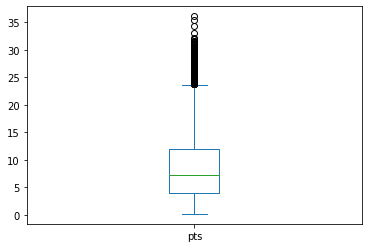

In [ ]:
df['pts'].plot.box()

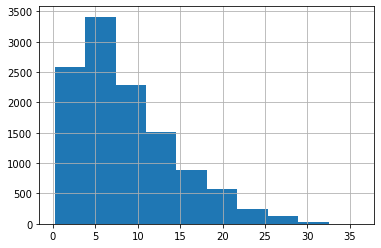

In [ ]:
df['pts'].hist()

Verificamos que o atributo não tem distribuição normal e por isso vamos ajustá-lo antes de partir para a remoção dos seus outliers.

In [ ]:
# Verificando se há valores nulos antes de aplicar o log na coluna
0 in df['pts'].unique()

False

Como não há valores nulos, podemos aplicar o log à coluna:

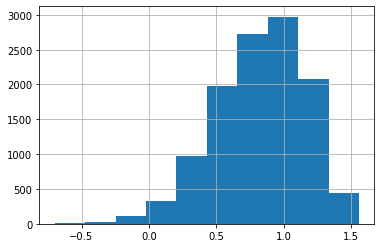

In [ ]:
df['pts_log'] = np.log10(df['pts'])
df['pts_log'].hist()

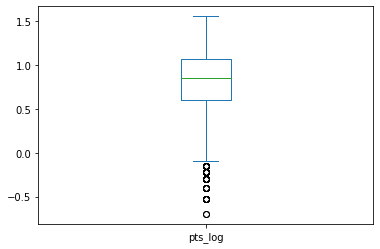

In [ ]:
df[['pts_log']].plot.box()

Agora observamos que há uma distribuição simétrica e vamos tratar seus outliers utilizando o z-score robusto.

In [ ]:
pts_log_mad = abs(df['pts_log'] - df['pts_log'].median()).median()*(1/0.6745)
pts_log_mad

0.3448074351491913

In [ ]:
df[abs(df['pts_log']-df['pts_log'].median())/pts_log_mad > 3.5]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log,pts_log
86,LaSalle Thompson,IND,36.0,208.28,111.130040,Texas,USA,1982.0,1.0,5.0,...,0.024,1996-97,0.0,1996,1997,0.317073,0.062,-1.207608,-1.619789,-0.397940
136,Tim Kempton,SAS,33.0,208.28,111.130040,Notre Dame,USA,1986.0,6.0,124.0,...,0.061,1996-97,0.0,1996,1997,0.121951,0.051,-1.292430,-1.214670,-0.397940
225,Charles Jones,HOU,40.0,205.74,97.522280,Albany State (GA),USA,1979.0,8.0,165.0,...,0.046,1996-97,0.0,1996,1997,0.146341,0.068,-1.167491,-1.337242,-0.522879
732,Kevin Salvadori,SAC,27.0,213.36,104.779752,North Carolina,USA,NaN,NaN,NaN,...,0.051,1997-98,1.0,1997,1998,0.195122,0.056,-1.251812,-1.292430,-0.522879
2203,Jamison Brewer,IND,21.0,187.96,80.739376,Auburn,USA,2001.0,2.0,40.0,...,0.321,2001-02,0.0,2001,2002,0.158537,0.044,-1.356547,-0.493495,-0.522879
3264,Hubert Davis,NJN,34.0,195.58,83.007336,North Carolina,USA,1992.0,1.0,20.0,...,0.083,2003-04,0.0,2003,2004,0.207317,0.032,-1.494850,-1.080922,-0.698970
3310,Mark Pope,DEN,32.0,208.28,106.594120,Kentucky,USA,1996.0,2.0,52.0,...,0.063,2004-05,0.0,2004,2005,0.109756,0.167,-0.777284,-1.200659,-0.397940
5021,Mark Madsen,MIN,33.0,205.74,115.665960,Stanford,USA,2000.0,1.0,29.0,...,0.044,2008-09,0.0,2008,2009,0.231707,0.084,-1.075721,-1.356547,-0.522879
5941,Patrick Ewing,NOH,27.0,203.20,106.594120,Georgetown,USA,2008.0,2.0,43.0,...,0.167,2010-11,0.0,2010,2011,0.085366,0.067,-1.173925,-0.777284,-0.397940
6017,Pops Mensah-Bonsu,NOH,27.0,205.74,106.594120,George Washington,USA,NaN,NaN,NaN,...,0.080,2010-11,1.0,2010,2011,0.085366,0.094,-1.026872,-1.096910,-0.522879


Cerca de 20 amostras foram detectadas como outliers e correspondem a jogadores com pontos por jogo abaixo do esperado. Portanto, elas serão removidas do dataframe.

In [ ]:
df = df[abs(df['pts_log']-df['pts_log'].median())/pts_log_mad <= 3.5]
df.shape

(11637, 29)

#### Assistências por Jogo (bivariado)

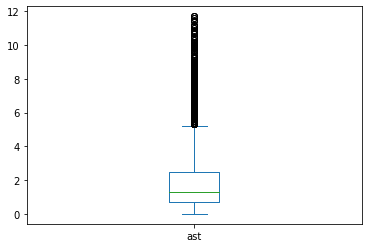

In [ ]:
df['ast'].plot.box()

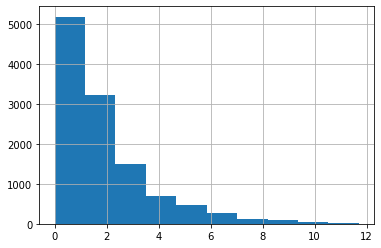

In [ ]:
df['ast'].hist()

Verificamos que o atributo não tem distribuição normal e por isso vamos ajustá-lo antes de partir para a remoção dos seus outliers.

In [ ]:
0 in df['ast'].unique()

True

Vamos remover os valores nulos da coluna antes do log:

In [ ]:
df = df[df['ast'] > 0.]

Agora podemos aplicar o log à coluna:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


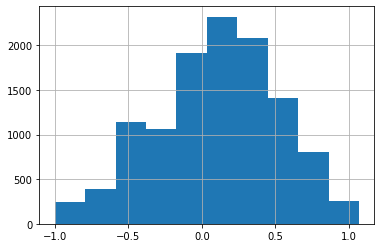

In [ ]:
df['ast_log'] = np.log10(df['ast'])
df['ast_log'].hist()

Agora observamos que há uma distribuição normalizada e vamos tratar seus outliers utilizando o z-score robusto.

In [ ]:
ast_log_mad = abs(df['ast_log'] - df['ast_log'].median()).median()*(1/0.6745)
ast_log_mad

0.42104767437390783

In [ ]:
df[abs(df['ast_log']-df['ast_log'].median())/ast_log_mad > 3]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,season,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log,pts_log,ast_log


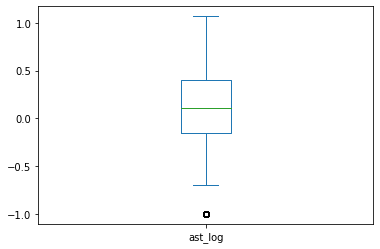

In [ ]:
df['ast_log'].plot.box()

Outliers não detectados.

#### Rebotes por Jogo (bivariado)

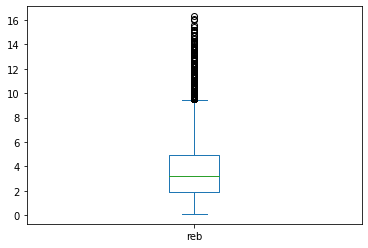

In [ ]:
df['reb'].plot.box()

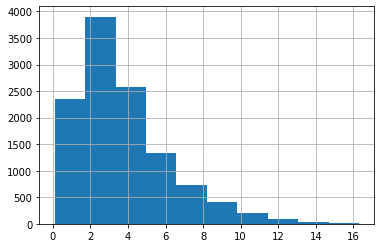

In [ ]:
df['reb'].hist()

Verificamos que o atributo não tem uma distribuição normal e por isso vamos ajustá-lo antes de partir para a remoção dos seus outliers.

In [ ]:
0 in df['reb'].unique()

False

Como não há valores nulos, podemos aplicar o log à coluna:


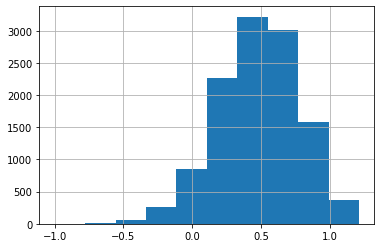

In [ ]:
df['reb_log'] = np.log10(df['reb'])
df['reb_log'].hist()

Agora observamos que há uma distribuição normalizada e vamos tratar seus outliers utilizando o z-score robusto.


In [ ]:
reb_log_mad = abs(df['reb_log'] - df['reb_log'].median()).median()*(1/0.6745)
reb_log_mad

0.30010407379989673

In [ ]:
df[abs(df['reb_log']-df['reb_log'].median())/reb_log_mad > 3.5]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,undrafted,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log,pts_log,ast_log,reb_log
744,Lawrence Moten,WAS,26.0,195.58,83.914520,Syracuse,USA,1995.0,2.0,36.0,...,0.0,1997,1998,0.097561,0.034,-1.468521,-0.669586,0.041393,-0.397940,-1.00000
2377,Damone Brown,PHI,23.0,203.20,91.625584,Syracuse,USA,2001.0,2.0,36.0,...,0.0,2001,2002,0.207317,0.037,-1.431798,-1.292430,0.146128,-1.000000,-0.69897
2906,Ndudi Ebi,MIN,20.0,205.74,90.718400,None,USA,2003.0,1.0,26.0,...,0.0,2003,2004,0.207317,0.074,-1.130768,-0.698970,-0.096910,-0.698970,-0.69897
3382,Luis Flores,DEN,24.0,187.96,88.450440,Manhattan,USA,2004.0,2.0,55.0,...,0.0,2004,2005,0.195122,0.015,-1.823909,-0.581699,0.342423,-0.154902,-0.69897
3706,Geno Carlisle,POR,28.0,190.50,90.718400,California,USA,NaN,NaN,NaN,...,1.0,2004,2005,0.073171,0.071,-1.148742,-0.954677,0.113943,-0.698970,-0.69897
5455,Patty Mills,POR,21.0,182.88,83.914520,Saint Mary's (CA),Australia,2009.0,2.0,55.0,...,0.0,2009,2010,0.121951,0.031,-1.508638,-0.602060,0.414973,-0.301030,-0.69897
7943,Toure' Murry,UTA,25.0,195.58,88.450440,Wichita State,USA,NaN,NaN,NaN,...,1.0,2014,2015,0.060976,0.067,-1.173925,-0.954677,0.079181,-0.698970,-0.69897
9279,Xavier Munford,MIL,26.0,193.04,78.471416,Rhode Island,USA,NaN,NaN,NaN,...,1.0,2017,2018,0.073171,0.050,-1.301030,-0.438899,-0.301030,-0.154902,-0.69897
9823,Brandon Goodwin,DEN,23.0,187.96,81.646560,None,USA,NaN,NaN,NaN,...,1.0,2018,2019,0.195122,0.016,-1.795880,-0.525784,0.146128,-0.045757,-0.69897
10342,Khyri Thomas,DET,24.0,190.50,95.254320,Creighton,USA,2018.0,2.0,38.0,...,0.0,2019,2020,0.111111,0.012,-1.920819,-1.013228,0.322219,-0.397940,-1.00000


Cerca de 10 amostras foram detectadas como outliers e correspondem a jogadores com rebs por jogo abaixo do esperado. Portanto, elas serão removidas do dataframe.


In [ ]:
df = df[abs(df['reb_log']-df['reb_log'].median())/reb_log_mad <= 3.5]
df.shape

(11621, 31)

#### Multivariado

In [ ]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'undrafted',
       'season_start_year', 'season_end_year', 'gp_pct', 'oreb_pct_non_zero',
       'oreb_pct_log', 'ast_pct_log', 'pts_log', 'ast_log', 'reb_log'],
      dtype='object')

Codificando os valores de cada atributo categórico com um encoder (possui métodos de transform e inverse_transform para não perder os valores categóricos originais).

In [ ]:
categorical_features = ['player_name', 'team_abbreviation', 'college', 'country', 'season']
encoders = dict()
for cat in categorical_features:
    encoders[cat] = preprocessing.LabelEncoder()
    df[cat] = encoders[cat].fit_transform(df[cat].tolist())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Elegendo atributos que não possuem dados nulos

In [ ]:
df_no_nan = df[['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'undrafted',
       'season_start_year', 'season_end_year']]

Identificando outliers com o EllipticEnvelope

In [ ]:
outlier_detector = EllipticEnvelope(contamination=0.01)
outlier_detector.fit(df_no_nan)

/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-49.528820302021785 > -49.897992122627954). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/covariance/_robust_covariance.py:189: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-49.717115472089333 > -50.538926889488252). You may want to try with a higher value of support_fraction (current value: 0.501).
  RuntimeWarning,


EllipticEnvelope(contamination=0.01)

In [ ]:
# predict returns 1 for an inlier and -1 for an outlier
scores = outlier_detector.predict(df_no_nan)

In [ ]:
scores

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df['outlier'] = scores

Outliers com atributos categóricos codificados

In [ ]:
df[df['outlier'] == -1]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log,pts_log,ast_log,reb_log,outlier
1231,1565,38,22.0,190.50,88.45044,64,6,NaN,NaN,NaN,...,1999,2000,0.646341,0.050,-1.301030,-0.621602,0.301030,-0.045757,0.000000,-1
1690,1856,34,27.0,208.28,122.46984,191,1,NaN,NaN,NaN,...,2000,2001,0.414634,0.043,-1.366532,-1.823909,0.342423,-1.000000,0.146128,-1
1706,1714,28,24.0,193.04,88.45044,282,1,NaN,NaN,NaN,...,2000,2001,0.353659,0.023,-1.638272,-0.395774,-0.154902,0.146128,-0.301030,-1
3414,1986,30,31.0,190.50,88.45044,251,13,1996.0,1.0,15.0,...,2004,2005,0.914634,0.025,-1.602060,-0.337242,1.190332,1.060698,0.518514,-1
3521,296,11,22.0,198.12,104.32616,191,1,2003.0,1.0,25.0,...,2004,2005,0.365854,0.035,-1.455932,-0.860121,0.591065,0.113943,0.255273,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,1079,37,34.0,203.00,99.00000,191,2,NaN,NaN,NaN,...,2021,2022,0.548780,0.012,-1.920819,-0.721246,0.857332,0.544068,0.462398,-1
11272,1318,3,29.0,188.00,88.00000,78,2,2011.0,1.0,1.0,...,2021,2022,0.353659,0.016,-1.795880,-0.598599,1.437751,0.763428,0.643453,-1
11334,1072,33,26.0,211.00,116.00000,245,2,NaN,NaN,NaN,...,2021,2022,0.658537,0.111,-0.954677,-0.974694,0.690196,-0.096910,0.414973,-1
11395,1700,3,33.0,185.00,81.00000,245,2,2009.0,2.0,55.0,...,2021,2022,0.987805,0.009,-2.045757,-0.974694,1.056905,0.361728,0.278754,-1


Outliers com atributos categóricos decodificados

In [ ]:
for cat in categorical_features:
    df[cat] = encoders[cat].inverse_transform(df[cat].tolist())

In [ ]:
df[df['outlier'] == -1]

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,season_start_year,season_end_year,gp_pct,oreb_pct_non_zero,oreb_pct_log,ast_pct_log,pts_log,ast_log,reb_log,outlier
1231,Milt Palacio,VAN,22.0,190.50,88.45044,Colorado State,Belize,NaN,NaN,NaN,...,1999,2000,0.646341,0.050,-1.301030,-0.621602,0.301030,-0.045757,0.000000,-1
1690,Ruben Wolkowyski,SEA,27.0,208.28,122.46984,None,Argentina,NaN,NaN,NaN,...,2000,2001,0.414634,0.043,-1.366532,-1.823909,0.342423,-1.000000,0.146128,-1
1706,Pepe Sanchez,PHI,24.0,193.04,88.45044,Temple,Argentina,NaN,NaN,NaN,...,2000,2001,0.353659,0.023,-1.638272,-0.395774,-0.154902,0.146128,-0.301030,-1
3414,Steve Nash,PHX,31.0,190.50,88.45044,Santa Clara,Canada,1996.0,1.0,15.0,...,2004,2005,0.914634,0.025,-1.602060,-0.337242,1.190332,1.060698,0.518514,-1
3521,Carlos Delfino,DET,22.0,198.12,104.32616,None,Argentina,2003.0,1.0,25.0,...,2004,2005,0.365854,0.035,-1.455932,-0.860121,0.591065,0.113943,0.255273,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,Joe Ingles,UTA,34.0,203.00,99.00000,None,Australia,NaN,NaN,NaN,...,2021,2022,0.548780,0.012,-1.920819,-0.721246,0.857332,0.544068,0.462398,-1
11272,Kyrie Irving,BRK,29.0,188.00,88.00000,Duke,Australia,2011.0,1.0,1.0,...,2021,2022,0.353659,0.016,-1.795880,-0.598599,1.437751,0.763428,0.643453,-1
11334,Jock Landale,SAS,26.0,211.00,116.00000,Saint Mary's,Australia,NaN,NaN,NaN,...,2021,2022,0.658537,0.111,-0.954677,-0.974694,0.690196,-0.096910,0.414973,-1
11395,Patty Mills,BRK,33.0,185.00,81.00000,Saint Mary's,Australia,2009.0,2.0,55.0,...,2021,2022,0.987805,0.009,-2.045757,-0.974694,1.056905,0.361728,0.278754,-1


Removendo outliers do dataframe

In [ ]:
df = df[df['outlier'] != -1]
df.shape

(11504, 32)

####Removendo colunas e dataframes auxiliares

In [ ]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'undrafted',
       'season_start_year', 'season_end_year', 'gp_pct', 'oreb_pct_non_zero',
       'oreb_pct_log', 'ast_pct_log', 'pts_log', 'ast_log', 'reb_log',
       'outlier'],
      dtype='object')

In [ ]:
df.drop(columns=['outlier', 'oreb_pct_non_zero', 'oreb_pct_log', 'ast_pct_log', 'pts_log', 'ast_log', 'reb_log'], inplace=True)
df.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(11504, 25)

In [ ]:
del df_non_zero, df_no_nan

In [ ]:
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct
0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996.0,1.0,29.0,...,0.127,0.182,0.142,0.536,0.052,1996-97,0.0,1996,1997,0.865854
1,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,NaN,NaN,NaN,...,0.016,0.115,0.151,0.535,0.099,1996-97,1.0,1996,1997,0.865854
2,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,NaN,NaN,NaN,...,0.083,0.152,0.167,0.542,0.101,1996-97,1.0,1996,1997,0.902439
3,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996.0,1.0,25.0,...,0.109,0.118,0.233,0.482,0.114,1996-97,0.0,1996,1997,0.512195
4,Martin Lewis,TOR,22.0,198.12,102.05820,Seward County Community College,USA,1995.0,2.0,50.0,...,0.087,0.045,0.135,0.470,0.125,1996-97,0.0,1996,1997,0.109756


### 😐 Normalização e discretização

Iniciamos essa fase transformando as colunas categóricas em índices, com o LabelEncoder do scikitlearn

In [ ]:
categorical_features = ['player_name', 'team_abbreviation', 'college', 'country', 'season']
encoders = dict()
for cat in categorical_features:
    encoders[cat] = preprocessing.LabelEncoder()
    df[cat] = encoders[cat].fit_transform(df[cat].tolist())
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct
0,2074,16,22.0,213.36,106.59412,66,72,1996.0,1.0,29.0,...,0.127,0.182,0.142,0.536,0.052,0,0.0,1996,1997,0.865854
1,1481,13,30.0,208.28,106.59412,119,72,NaN,NaN,NaN,...,0.016,0.115,0.151,0.535,0.099,0,1.0,1996,1997,0.865854
2,1472,2,29.0,210.82,111.13004,229,72,NaN,NaN,NaN,...,0.083,0.152,0.167,0.542,0.101,0,1.0,1996,1997,0.902439
3,1471,9,22.0,205.74,106.59412,191,72,1996.0,1.0,25.0,...,0.109,0.118,0.233,0.482,0.114,0,0.0,1996,1997,0.512195
4,1470,35,22.0,198.12,102.05820,252,72,1995.0,2.0,50.0,...,0.087,0.045,0.135,0.470,0.125,0,0.0,1996,1997,0.109756


In [ ]:
df.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'undrafted',
       'season_start_year', 'season_end_year', 'gp_pct'],
      dtype='object')

As colunas `ast_pct`, `oreb_pct`, `dreb_pct`, `usg_pct`, `ts_pct` e `gp_pct`  já se encontram normalizadas entre 0 e 1 por serem porcentagens, então utilizaremos o MinMaxScaler para normalizar as outras colunas de atributos numéricos e manter o padrão.

In [ ]:
numerical_features = ['age', 'player_height', 'player_weight', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'season_start_year', 'season_end_year']
num_encoders = dict()
for feature in numerical_features:
    num_encoders[feature] = preprocessing.MinMaxScaler()
    df[feature] = num_encoders[feature].fit_transform(df[[feature]])
df.head()

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,undrafted,season_start_year,season_end_year,gp_pct
0,2074,16,0.153846,0.750000,0.485714,66,72,0.568966,0.125,0.175758,...,0.127,0.182,0.142,0.536,0.052,0,0.0,0.0,0.0,0.865854
1,1481,13,0.461538,0.678571,0.485714,119,72,NaN,NaN,NaN,...,0.016,0.115,0.151,0.535,0.099,0,1.0,0.0,0.0,0.865854
2,1472,2,0.423077,0.714286,0.533333,229,72,NaN,NaN,NaN,...,0.083,0.152,0.167,0.542,0.101,0,1.0,0.0,0.0,0.902439
3,1471,9,0.153846,0.642857,0.485714,191,72,0.568966,0.125,0.151515,...,0.109,0.118,0.233,0.482,0.114,0,0.0,0.0,0.0,0.512195
4,1470,35,0.153846,0.535714,0.438095,252,72,0.551724,0.250,0.303030,...,0.087,0.045,0.135,0.470,0.125,0,0.0,0.0,0.0,0.109756


Os dados numéricos agora se encontram todos normalizados entre 0 e 1.